# Code for Chapter 4

Import from Chapter 3 - Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
df = pd.read_csv('cardiac_complete_v1.csv')
labels = df.columns.values

def get_features(labels,check=False):
    labels_dem = []; labels_lab = []; labels_proc = []; 
    labels_drug = []; labels_tar = [];
    if 'expire_flag' in labels:
        labels_tar.append('expire_flag')
    if 'age' in labels:
        labels_dem.append('age')
        if 'gender' in labels:
            labels_dem.append('gender')
    # Edit this section according to the dataset
    labels_lab = labels[5:74]
    labels_proc = labels[74:88]
    labels_drug = labels[88:]
    
    labels_dem = np.array(labels_dem,dtype=object)
    labels_tar = np.array(labels_tar,dtype=object)
    
    check_features(labels_dem,'Demographic',check)
    check_features(labels_lab,'Laboratory Tests',check)
    check_features(labels_proc,'Procedures',check)
    check_features(labels_drug,'Drug Interventions',check)
    check_features(labels_tar,'Target Value',check)
    
    return labels_dem,labels_lab,labels_proc,labels_drug,labels_tar

def check_features(labels,type,check=False):
    print('Total ' + type + ' Features: ' + str(len(labels)) )
    if check:
        print(*labels, sep = ", ")  

labels_dem,labels_lab,labels_proc,labels_drug,labels_tar = get_features(labels,False)

def clean_dataframe(data):
    data = data.copy()
    labels_df = data.columns.values
    
    # Cleaning
    data = data.replace(['>20.2'], 20.3).replace(['GREATER THAN 10'], 10.1).replace(['>150'], 151).replace(['>1000'], 1001)
    data = data.replace('0-2',1).replace(['<1','<1.0'],0).replace('3-May',4).replace('6-Oct',8).replace('Nov-20',15).replace('21-50',35).replace('>50',51)
    data = data.replace(['.',' ', 'NotDone','NOTDONE'],np.nan)
    data = data.replace('>80',81).replace('>300',301).replace('>500',501).replace('<35',34).replace('<1 /HPF',0).replace('>8',9)
    
    data['gender'] = data['gender'].replace('M',0).replace('F',1)
    data = data.replace(['NEGATIVE NO EOS SEEN', 'POSITIVE RARE EOS'],0)
    data = data.replace('ERROR PREVIOUSLY REPORTED AS 9.4',9.4).replace('ERROR PREVIOUSLY REPORTED AS 32.6',32.6).replace('GREATER THAN 30',30).replace('ERROR PREVIOUSLY REPORTED AS 100',100).replace('150 IS HIGHEST MEASURED PTT',150).replace('ERROR PREVIOUSLY REPORTED AS 313',313).replace('ERROR PREVIOUSLY REPORTED AS 14.8',14.8).replace('ERROR PREVIOUSLY REPORTED AS 2.90',2.90).replace('ERROR PREVIOUSLY REPORTED AS 10.1',10.1)
    data = data.replace('100-250',175).replace('1-2',1.5).replace('2-4',3).replace('25-100',62.5).replace('25-50',37.5).replace('100-200',150).replace('50-200',125).replace('100-500',300).replace('75-100',87.5).replace('12.5-25',18).replace('50-100',75).replace('100-400',250)
    data = data.replace('1000-2000',1500).replace('2200-4300',3250).replace('1500-2900',2200).replace('1500-3000',2250).replace('400-900',650).replace('1400-2800',2100).replace('1700-3500',2600).replace('1900-3800',2850)

    data['Specific Gravity'] = data['Specific Gravity'].replace('<1.005',0).replace('<=1.005',2).replace('>=1.030',3).replace('>1.030',4).replace('>=1.035',5).replace('>1.035',6).replace('>1.050',7).replace('>1.080',8)
    data['Acetaminophen'] = data['Acetaminophen'].replace('325-650', 500).replace('500-1000',750)
    data = data.replace('15-30',22.5).replace('30-60',45).replace('30-45',37.5)
    data = data.replace('0.5-2',1.25).replace('0.5-1',0.75).replace('1-5',3).replace('2-8',5).replace('0.25-2',1.125).replace('0.25-0.5',0.375)
    data = data.replace('2-4',3).replace('1-2',1.5).replace('2-6',4).replace('0.5-4',2.25).replace('2-5',3.5).replace('1-4',2.5)
    data = data.replace('0.5-4.0',2.25).replace('1-8',4.5)
    data = data.replace('200-400',300).replace('400-600',500).replace('15-30',22.5).replace('20-40',30).replace('40-60',50).replace('4-8',6)
    data = data.replace('1-6',3.5).replace('2-10',6).replace('1-3',2).replace('1-10',5.5).replace('4-6',5)
    
    data['Potassium Chloride'][data['Potassium Chloride'] == 9 ] = 10
    data['Potassium Chloride'][data['Potassium Chloride'] == 2.5 ] = 0
    data['Potassium Chloride'][data['Potassium Chloride'] == 12 ] = 10

    # New additions
    data['Bacteria'] = data['Bacteria'].replace(['NONE','O'],0).replace('RARE',1).replace('OCC',3).replace('FEW',2).replace('MOD',4).replace('MANY',5)
    data['Bilirubin'] = data['Bilirubin'].replace('SM',0).replace('MOD',1).replace('LG',2)
    data['Blood'] = data['Blood'].replace('SM',0).replace('MOD',1).replace(['LGE','LG'],2)
    data['Creatine Kinase, MB Isoenzyme'] = data['Creatine Kinase, MB Isoenzyme'].replace('GREATER THAN 500',501)
    data['Eosinophils'] = data['Eosinophils'].replace(['POSITIVE MODERATE EOS'],0)
    data['Intubated'] = data['Intubated'].replace('INTUBATED',1).replace('NOT INTUBATED',0)
    data['Leukocytes'] = data['Leukocytes'].replace('SM',0).replace('MOD',1).replace('LG',2)
    data['Nitrite'] = data['Nitrite'].replace('POS',1)
    data['SPECIMEN TYPE'] = data['SPECIMEN TYPE'].replace('ART',0).replace('VEN',1).replace('MIX',2).replace('CENTRAL VENOUS',3)
    data['Troponin T'] = data['Troponin T'].replace(['LESS THAN 0.01','<0.01'],0.01).replace('<0.02',0.02).replace('<0.10',0.10)
    data['Ventilator'] = data['Ventilator'].replace('CONTROLLED',1).replace('SPONTANEOUS',3).replace('IMV',2)
    data['Yeast'] = data['Yeast'].replace('NONE',0).replace('FEW',2).replace('RARE',1).replace('OCC',3).replace('MOD',4).replace('MANY',5)
    data = data.replace(['1-Feb', '2-Apr'],0.5)
    data['Insulin'] = data['Insulin'].replace('Feb-16',0.125).replace(['16; give 1/2 dose when NPO'],16)
    data['Meperidine'] = data['Meperidine'].replace('112.5-25',18).replace('25-30',27.5)
    data['Metoprolol'] = data['Metoprolol'].replace(['Oct-20', '5-Oct'],0.5).replace('May-20',0.25)
    data['Nitroglycerin'] = data['Nitroglycerin'].replace('0.25-0.6',0.5).replace('20-200',100).replace('0-10',5)
    data['Ondansetron'] = data['Ondansetron'].replace('4-Aug',0.5).replace('2-Aug',0.25)
    data['Urine Appearance'] = data['Urine Appearance'].replace(['Clear', 'CLEAR'],0).replace(['CLO','Cloudy','CLOUDY'],1).replace(['SlCloudy','SlCldy'],2).replace(['HAZY','Hazy'],3).replace(['SlHazy','SLHAZY'],4).replace('TURBID',5).replace('CLO',2)
    data['Urine Color'] = data['Urine Color'].replace(['Yellow', 'YELLOW'],1).replace(['Amber','LtAmb','DkAmb','AMBER','AMB','DKAMBE','DKAMBER'],2).replace(['PINK', 'Red','RED',],3).replace(['Straw','STRAW','Other', 'None'],0).replace(['Orange','ORANGE'],4).replace(['Brown','B'],6).replace('Green',5)
    
    data = data.replace(['ERROR', 'COMPUTER NETWORK FAILURE. TEST NOT RESULTED.','NEG','nan','CHRISTA1','TR'], np.nan)

    check_unclean(data)
    
    data_cleaned = data.astype(float)
    return data_cleaned

def check_unclean(data):
    ## PRINT THE VALUES WHICH ARE NOT YET FILLED
    labels = data.columns.values
    for j in labels:
        non_numeric = []
        for i in range(data.shape[0]):
            x = data[j].iloc[i]
            try: 
                float(x)
            except:
                if x not in non_numeric:
                    non_numeric.append(x)
        if len(non_numeric)>0:
            print(j, non_numeric)

data = clean_dataframe(df)
data.head(5)

Total Demographic Features: 2
Total Laboratory Tests Features: 69
Total Procedures Features: 14
Total Drug Interventions Features: 38
Total Target Value Features: 1


,Unnamed: 0,gender,expire_flag,admit_no,age,Alanine Aminotransferase (ALT),Albumin,Alkaline Phosphatase,Anion Gap,Asparate Aminotransferase (AST),...,Pantoprazole Sodium,Pneumococcal Vac Polyvalent,Potassium Chloride,Ranitidine,Simvastatin,Sodium Bicarbonate,Sucralfate,Vancomycin,Vancomycin HCl,Warfarin
0,3.0,0.0,1.0,1.0,76.0,25.0,1.8,89.0,13.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13.0,1.0,0.0,1.0,40.0,16.0,3.9,49.0,8.0,16.0,...,NaN,NaN,20.0,150.0,NaN,100.0,1.0,NaN,1000.0,NaN
2,20.0,1.0,0.0,1.0,76.0,NaN,NaN,NaN,12.0,NaN,...,NaN,NaN,40.0,150.0,NaN,NaN,1.0,NaN,NaN,NaN
3,23.0,0.0,0.0,1.0,71.0,NaN,NaN,NaN,12.0,NaN,...,NaN,NaN,20.0,150.0,NaN,NaN,1.0,NaN,NaN,NaN
4,28.0,0.0,0.0,1.0,74.0,NaN,NaN,NaN,13.0,NaN,...,NaN,NaN,20.0,75.0,NaN,NaN,1.0,NaN,NaN,NaN


In [2]:
# Selecting only Demographic + Lab Test Features
features_lab_raw = np.concatenate((labels_dem,labels_lab))
# Selecting Demographic + Lab Test + Interventional Features
# features_int_raw = np.concatenate((labels_dem,labels_lab,labels_proc,labels_drug))
labels_tar

# Select the features which are being used
X_raw = data[features_lab_raw]
Y = data[labels_tar]

missing_percentage = (X_raw.isna().sum(axis=0)/(X_raw.shape[0]/100)).values
features_lab = features_lab_raw.copy().tolist()
for i in range(len(missing_percentage)):
    if missing_percentage[i] > 50:
        #print(features_lab_raw[i], missing_percentage[i])
        features_lab.remove(features_lab_raw[i])

## Select feature list
option_features = 'intervention'
features_chosen = features_lab
# Select either (A) only lab test + demographic variables, or (B) lab test + interventional features
if option_features == 'intervention':
    features_chosen = np.concatenate((features_lab,labels_proc,labels_drug))
X = data[features_chosen]
if option_features == 'intervention':
#    X[labels_proc] = X[labels_proc].applymap(lambda x: 0 if np.isnan(x) else x)   
#    X[labels_drug] = X[labels_drug].applymap(lambda x: 0 if np.isnan(x) else 1) 
    X[labels_proc] = X[labels_proc].applymap(lambda x: 0 if np.isnan(x) else x)   
    X[labels_drug] = X[labels_drug].applymap(lambda x: 0 if np.isnan(x) else 1) 


import statistics
from statistics import stdev
def checkbinary(row):
    return np.array_equal(row.dropna(), row.dropna().astype(bool))

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold

crossval = KFold(n_splits=4,shuffle=True,random_state=420)
for train_index, test_index in crossval.split(X):
    Xtrain, Xtest, Ytrain, Ytest = X.iloc[train_index,:], X.iloc[test_index,:], Y.iloc[train_index], Y.iloc[test_index]

from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
Imputer = IterativeImputer(max_iter=20)

# Train a MICE imputer on the Training Set
# FIt the Imputer on the Test Set 

Xtrain_bef_imp = Xtrain.copy()
Xtest_bef_imp = Xtest.copy()

Xtrain[features_chosen] = Imputer.fit_transform(Xtrain[features_chosen])
Xtest[features_chosen] = Imputer.transform(Xtest[features_chosen])

# Train a normaliser on the Training Set
# Fit the normaliser on the test set

scaler = preprocessing.MinMaxScaler()
scaler.fit(Xtrain)
Xtrain[Xtrain.columns.values] = scaler.transform(Xtrain[Xtrain.columns.values])
Xtest[Xtrain.columns.values] = scaler.transform(Xtest[Xtrain.columns.values])

C:\Users\Ming\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


### Chapter 4.3.3 Actionability Derived from Inherently Causal Models - Probability Graphical Models

#### 1. Use the NOTEARS Algorithm to factorise a graphical structure

#### Clean data to be suitable for Chapter 4

Imputation and Preprocessing

Taking the important SHAP features from Chapter 3

In [3]:
shap_population_rank = [ 0, 26, 73, 32, 72, 53, 64, 74, 16, 71, 48, 36, 67,  8, 45, 35, 87,
       55, 76, 61, 51, 57, 13, 21, 86, 58, 49,  7, 56, 30, 80, 70, 20,  2,
       17, 12, 28, 82, 66, 50, 68, 54,  1, 60, 52, 59, 14,  3, 63, 69, 34,
       78, 11, 27, 79, 62, 85, 65, 23, 41, 46, 29, 88, 83, 19, 81, 43, 10,
        6, 38, 33, 47, 84, 24, 77, 25, 31, 40, 18, 15,  9, 75, 22,  4, 39,
       42,  5, 44, 37]
features_reduced = shap_population_rank[:24]

In [4]:
#Get a verbose list of chosen features
#features_chosen[features_reduced]

# Data Cleaning
data_train = pd.concat([Xtrain[features_chosen[features_reduced]],Ytrain],axis=1)
data_train = data_train.rename(columns={'Metoprolol Tartrate': 'Metoprolol_Tartrate', 'Extracorporeal circulation auxiliary to open heart surgery':'ExtracorporealCirculation', 'Calcium Gluconate': 'Calcium_Gluconate', 'Insulin Human Regular':'Insulin_Human_Regular', 'Nitroprusside Sodium': 'Nitroprusside_Sodium','Urea Nitrogen':'Urea_Nitrogen', 'Vancomycin HCl': 'Vancomycin_HCl','Single internal mammary-coronary artery bypass':'Single_artery_bypass'})
data_test = pd.concat([Xtest[features_chosen[features_reduced]],Ytest],axis=1)
data_test = data_test.rename(columns={'Metoprolol Tartrate': 'Metoprolol_Tartrate', 'Extracorporeal circulation auxiliary to open heart surgery':'ExtracorporealCirculation', 'Calcium Gluconate': 'Calcium_Gluconate', 'Insulin Human Regular':'Insulin_Human_Regular', 'Nitroprusside Sodium': 'Nitroprusside_Sodium','Urea Nitrogen':'Urea_Nitrogen', 'Vancomycin HCl': 'Vancomycin_HCl','Single internal mammary-coronary artery bypass':'Single_artery_bypass'})

In [5]:
data_train.columns.values

array(['age', 'RDW', 'Neostigmine', 'Urea_Nitrogen',
       'Metoprolol_Tartrate', 'Aspirin', 'Insulin_Human_Regular',
       'Nitroglycerin', 'MCHC', 'Metoprolol', 'Single_artery_bypass',
       'pO2', 'Levofloxacin', 'Creatinine', 'ExtracorporealCirculation',
       'pH', 'Vancomycin_HCl', 'Atorvastatin', 'Nitroprusside_Sodium',
       'Furosemide', 'Acetaminophen', 'Calcium_Gluconate', 'Hemoglobin',
       'PTT', 'expire_flag'], dtype=object)

In [6]:
data_train.head(5)

,age,RDW,Neostigmine,Urea_Nitrogen,Metoprolol_Tartrate,Aspirin,Insulin_Human_Regular,Nitroglycerin,MCHC,Metoprolol,...,pH,Vancomycin_HCl,Atorvastatin,Nitroprusside_Sodium,Furosemide,Acetaminophen,Calcium_Gluconate,Hemoglobin,PTT,expire_flag
0,0.811594,0.282051,0.0,0.128788,0.0,0.0,0.0,0.0,0.553846,0.0,...,0.733333,0.0,0.0,0.0,0.0,0.0,0.0,0.285714,0.809631,1.0
1,0.289855,0.166667,1.0,0.045455,0.0,1.0,0.0,1.0,0.630769,1.0,...,0.725000,1.0,1.0,1.0,1.0,1.0,1.0,0.366460,0.073740,0.0
4,0.782609,0.141026,1.0,0.056818,0.0,1.0,0.0,1.0,0.800000,1.0,...,0.716667,0.0,0.0,1.0,1.0,1.0,1.0,0.490683,0.103085,0.0
6,1.000000,0.141026,0.0,0.102273,0.0,0.0,0.0,1.0,0.638462,1.0,...,0.607327,0.0,1.0,0.0,1.0,1.0,0.0,0.546584,0.051919,1.0
7,0.724638,0.250000,1.0,0.071970,0.0,1.0,1.0,1.0,0.707692,1.0,...,0.333333,0.0,1.0,0.0,1.0,1.0,1.0,0.478261,0.072235,0.0


#### Run the models

In [7]:
import causalnex
import warnings
warnings.filterwarnings("ignore")
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas

sm = StructureModel()
sm = from_pandas(data_train, w_threshold=0.2)
sm.edges

OutEdgeView([('age', 'Metoprolol_Tartrate'), ('age', 'expire_flag'), ('RDW', 'age'), ('RDW', 'Metoprolol_Tartrate'), ('RDW', 'MCHC'), ('RDW', 'Metoprolol'), ('RDW', 'Levofloxacin'), ('RDW', 'ExtracorporealCirculation'), ('RDW', 'pH'), ('RDW', 'Furosemide'), ('RDW', 'Acetaminophen'), ('RDW', 'Calcium_Gluconate'), ('RDW', 'Hemoglobin'), ('RDW', 'expire_flag'), ('Neostigmine', 'Aspirin'), ('Neostigmine', 'Insulin_Human_Regular'), ('Neostigmine', 'Nitroglycerin'), ('Neostigmine', 'Metoprolol'), ('Neostigmine', 'Levofloxacin'), ('Neostigmine', 'Nitroprusside_Sodium'), ('Neostigmine', 'Acetaminophen'), ('Neostigmine', 'Calcium_Gluconate'), ('Urea_Nitrogen', 'age'), ('Urea_Nitrogen', 'RDW'), ('Urea_Nitrogen', 'Insulin_Human_Regular'), ('Urea_Nitrogen', 'MCHC'), ('Urea_Nitrogen', 'Metoprolol'), ('Urea_Nitrogen', 'pH'), ('Urea_Nitrogen', 'Atorvastatin'), ('Urea_Nitrogen', 'Furosemide'), ('Urea_Nitrogen', 'Calcium_Gluconate'), ('Urea_Nitrogen', 'Hemoglobin'), ('Urea_Nitrogen', 'PTT'), ('Urea_Nit

#### Vary the weights, and show the change in important connections

In [8]:
sm_truncate = sm.copy()
sm_truncate.remove_edges_below_threshold(0.5)
sm_truncate.edges

OutEdgeView([('age', 'expire_flag'), ('RDW', 'Hemoglobin'), ('RDW', 'expire_flag'), ('Neostigmine', 'Insulin_Human_Regular'), ('Neostigmine', 'Nitroglycerin'), ('Neostigmine', 'Calcium_Gluconate'), ('Urea_Nitrogen', 'age'), ('Urea_Nitrogen', 'RDW'), ('Urea_Nitrogen', 'MCHC'), ('Urea_Nitrogen', 'Furosemide'), ('Urea_Nitrogen', 'Hemoglobin'), ('Urea_Nitrogen', 'PTT'), ('Urea_Nitrogen', 'expire_flag'), ('Metoprolol_Tartrate', 'Metoprolol'), ('MCHC', 'pH'), ('Creatinine', 'age'), ('Creatinine', 'Urea_Nitrogen'), ('Creatinine', 'Aspirin'), ('Creatinine', 'Furosemide'), ('ExtracorporealCirculation', 'Neostigmine'), ('ExtracorporealCirculation', 'Metoprolol_Tartrate'), ('ExtracorporealCirculation', 'Single_artery_bypass'), ('ExtracorporealCirculation', 'Acetaminophen'), ('Hemoglobin', 'MCHC')])

#### Draw graph

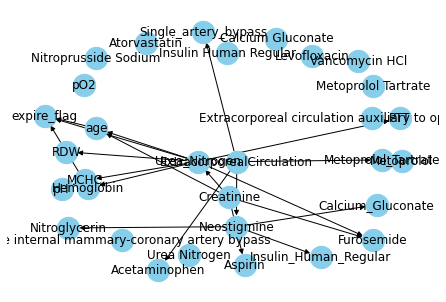

In [9]:
import networkx as nx

sm_G = nx.DiGraph()

sm_G.add_nodes_from(features_chosen[features_reduced])
sm_G.add_edges_from([('age', 'expire_flag'), ('RDW', 'Hemoglobin'), ('age', 'expire_flag'), ('RDW', 'Hemoglobin'), ('RDW', 'expire_flag'), ('Neostigmine', 'Insulin_Human_Regular'), ('Neostigmine', 'Nitroglycerin'), ('Neostigmine', 'Calcium_Gluconate'), ('Urea_Nitrogen', 'age'), ('Urea_Nitrogen', 'RDW'), ('Urea_Nitrogen', 'MCHC'), ('Urea_Nitrogen', 'Furosemide'), ('Urea_Nitrogen', 'Hemoglobin'), ('Urea_Nitrogen', 'PTT'), ('Urea_Nitrogen', 'expire_flag'), ('Metoprolol_Tartrate', 'Metoprolol'), ('MCHC', 'pH'), ('Creatinine', 'age'), ('Creatinine', 'Urea_Nitrogen'), ('Creatinine', 'Aspirin'), ('Creatinine', 'Furosemide'), ('ExtracorporealCirculation', 'Neostigmine'), ('ExtracorporealCirculation', 'Metoprolol_Tartrate'), ('ExtracorporealCirculation', 'Single_artery_bypass'), ('ExtracorporealCirculation', 'Acetaminophen'), ('Hemoglobin', 'MCHC')])

plt.figure()
nx.draw(sm_G, with_labels=True, node_size=500, node_color="skyblue", node_shape="o")
plt.show()

#### 2. Build the Bayesian Network, assuming the causal structure previously found in the last section

#### Cleaning: Binarise Data. NB: Many variables in the dataset are currently continuous. The simple method to treat this as a low-high kind of binarisation

In [10]:
# Training Set
for i in range(data_train.shape[0]):
    for j in range(data_train.shape[1]):
        if data_train.iloc[i,j]> 0.5:
            data_train.iloc[i,j] = 1
        else: 
            data_train.iloc[i,j] = 0
# Test Set
for i in range(data_test.shape[0]):
    for j in range(data_test.shape[1]):
        if data_test.iloc[i,j]> 0.5:
            data_test.iloc[i,j] = 1
        else: 
            data_test.iloc[i,j] = 0

#### Build the network

In [11]:
from causalnex.network import BayesianNetwork
# Based on the structure in SM, build the Bayesian Network.
bn = BayesianNetwork(sm)
# Train the model with the conditional probability.
bn = bn.fit_node_states(data_train)
bn = bn.fit_cpds(data_train, method="BayesianEstimator", bayes_prior="K2")

#### For a certain feature, calculate the conditional probability

In [12]:
bn.cpds["Hemoglobin"]
#bn.cpds["expire_flag"]
#bn.cpds["RDW"]

ExtracorporealCirculation       0.0                                           \
PTT                             0.0                                            
RDW                             0.0                           1.0              
Single_artery_bypass            0.0            1.0            0.0        1.0   
Urea_Nitrogen                   0.0  1.0       0.0  1.0       0.0  1.0   0.0   
Hemoglobin                                                                     
0.0                        0.744925  0.8  0.591549  0.5  0.927835  0.5  0.75   
1.0                        0.255075  0.2  0.408451  0.5  0.072165  0.5  0.25   

ExtracorporealCirculation                      ...  1.0                      \
PTT                                  1.0       ...  0.0            1.0        
RDW                                  0.0       ...  1.0            0.0        
Single_artery_bypass                 0.0       ...  1.0            0.0        
Urea_Nitrogen              1.0       0.0  1.0  ...  0.0  1.0       0.0  1.0   
Hemoglobin                                     ...                            
0.0                        0.5  0.709877  0.5  ...  0.5  0.5  0.666667  0.5   
1.0                        0.5  0.290123  0.5  ...  0.5  0.5  0.333333  0.5   

ExtracorporealCirculation                                 
PTT                                                       
RDW                                   1.0                 
Single_artery_bypass        1.0       0.0       1.0       
Urea_Nitrogen               0.0  1.0  0.0  1.0  0.0  1.0  
Hemoglobin                                                
0.0                        0.75  0.5  0.5  0.5  0.5  0.5  
1.0                        0.25  0.5  0.5  0.5  0.5  0.5  

[2 rows x 32 columns]

#### 3. Establish do-calculus

#### Build the do-calculus model

In [13]:
from causalnex.inference import InferenceEngine

# Build the inference estimator
ie = InferenceEngine(bn)
marginals = ie.query()
# Get proportion of a certain feature in the dataset
marginals['expire_flag']

{0.0: 0.6661808673394098, 1.0: 0.3338191326605905}

#### Condition on input variables: change the parent variable and see how it affects a child variable

In [14]:
# Query what happens if condition on having input variables in a particular range (age = 0 or age = 1)
marginals_short = ie.query({"age": 0.0})
marginals_long = ie.query({"age": 1.0})
print("1. Output | Age low", ie.query({"age": 0.0})["expire_flag"])
print("2. Output | Age high", ie.query({"age": 1.0})["expire_flag"])

1. Output | Age low {0.0: 0.8007150113248559, 1.0: 0.19928498867514405}
2. Output | Age high {0.0: 0.63929418193141, 1.0: 0.36070581806859}


In [15]:
for i in data_test.columns.values:
    print("Feature " + i + 
          ": Original value: %.4f" % (InferenceEngine(bn).query()['expire_flag'][1.0]) + 
          ", Modify to 0: %.4f" % (InferenceEngine(bn).query({i: 0.0})["expire_flag"][1.0]) +  
          ", Modify to 1: %.4f" % (InferenceEngine(bn).query({i: 1.0})["expire_flag"][1.0]))

Feature age: Original value: 0.3338, Modify to 0: 0.1993, Modify to 1: 0.3607
Feature RDW: Original value: 0.3338, Modify to 0: 0.3204, Modify to 1: 0.6768
Feature Neostigmine: Original value: 0.3338, Modify to 0: 0.3343, Modify to 1: 0.3332
Feature Urea_Nitrogen: Original value: 0.3338, Modify to 0: 0.3335, Modify to 1: 0.5533
Feature Metoprolol_Tartrate: Original value: 0.3338, Modify to 0: 0.3315, Modify to 1: 0.3383
Feature Aspirin: Original value: 0.3338, Modify to 0: 0.3332, Modify to 1: 0.3341
Feature Insulin_Human_Regular: Original value: 0.3338, Modify to 0: 0.3341, Modify to 1: 0.3334
Feature Nitroglycerin: Original value: 0.3338, Modify to 0: 0.3343, Modify to 1: 0.3334
Feature MCHC: Original value: 0.3338, Modify to 0: 0.3793, Modify to 1: 0.3283
Feature Metoprolol: Original value: 0.3338, Modify to 0: 0.3338, Modify to 1: 0.3338
Feature Single_artery_bypass: Original value: 0.3338, Modify to 0: 0.3337, Modify to 1: 0.3375
Feature pO2: Original value: 0.3338, Modify to 0: 0

#### Do-intervention: What if we enact a change on the probability distribution of the parent variable (in this case, age)?

In [16]:
print("Previous Marginal", ie.query()["expire_flag"])
ie.do_intervention("age",{0.0: 1,1.0: 0})
print("Previous Marginal", ie.query()["expire_flag"])

Previous Marginal {0.0: 0.6661808673394101, 1.0: 0.3338191326605905}
Previous Marginal {0.0: 0.8124125564693649, 1.0: 0.18758744353063528}


#### 4. Obtain model Accuracy

In [17]:
from causalnex.evaluation import classification_report
## TRAINING SET
classification_report(bn, data_train, "expire_flag")

{'expire_flag_0.0': {'precision': 0.6799440950384347,
  'recall': 0.9838220424671386,
  'f1-score': 0.8041322314049587,
  'support': 1978},
 'expire_flag_1.0': {'precision': 0.7037037037037037,
  'recall': 0.07661290322580645,
  'f1-score': 0.13818181818181818,
  'support': 992},
 'accuracy': 0.6808080808080809,
 'macro avg': {'precision': 0.6918238993710693,
  'recall': 0.5302174728464725,
  'f1-score': 0.47115702479338845,
  'support': 2970},
 'weighted avg': {'precision': 0.6878799643299993,
  'recall': 0.6808080808080809,
  'f1-score': 0.5817003088738626,
  'support': 2970}}

In [18]:
## TEST SET
classification_report(bn, data_test, "expire_flag")

{'expire_flag_0.0': {'precision': 0.6788702928870293,
  'recall': 0.9848254931714719,
  'f1-score': 0.8037151702786378,
  'support': 659},
 'expire_flag_1.0': {'precision': 0.7058823529411765,
  'recall': 0.07250755287009064,
  'f1-score': 0.1315068493150685,
  'support': 331},
 'accuracy': 0.6797979797979798,
 'macro avg': {'precision': 0.6923763229141029,
  'recall': 0.5286665230207813,
  'f1-score': 0.46761100979685316,
  'support': 990},
 'weighted avg': {'precision': 0.687901597814224,
  'recall': 0.6797979797979798,
  'f1-score': 0.5789667316534445,
  'support': 990}}

#### 5. Conclusions:

TO DO: 
1. Instead of binarising, set into groups

1. Causal models are ok
2. Bayesian Networks allows the conditional probabilities to be found

Drawbacks:
1. Model is very much incorrect - a lot of connections do not make sense. For example, why does the RDW -> age connection make sense?
2. The accuracy for these models is abysmal. A possibility could be because the feature values are binarised

In [19]:
sm.edges

OutEdgeView([('age', 'Metoprolol_Tartrate'), ('age', 'expire_flag'), ('RDW', 'age'), ('RDW', 'Metoprolol_Tartrate'), ('RDW', 'MCHC'), ('RDW', 'Metoprolol'), ('RDW', 'Levofloxacin'), ('RDW', 'ExtracorporealCirculation'), ('RDW', 'pH'), ('RDW', 'Furosemide'), ('RDW', 'Acetaminophen'), ('RDW', 'Calcium_Gluconate'), ('RDW', 'Hemoglobin'), ('RDW', 'expire_flag'), ('Neostigmine', 'Aspirin'), ('Neostigmine', 'Insulin_Human_Regular'), ('Neostigmine', 'Nitroglycerin'), ('Neostigmine', 'Metoprolol'), ('Neostigmine', 'Levofloxacin'), ('Neostigmine', 'Nitroprusside_Sodium'), ('Neostigmine', 'Acetaminophen'), ('Neostigmine', 'Calcium_Gluconate'), ('Urea_Nitrogen', 'age'), ('Urea_Nitrogen', 'RDW'), ('Urea_Nitrogen', 'Insulin_Human_Regular'), ('Urea_Nitrogen', 'MCHC'), ('Urea_Nitrogen', 'Metoprolol'), ('Urea_Nitrogen', 'pH'), ('Urea_Nitrogen', 'Atorvastatin'), ('Urea_Nitrogen', 'Furosemide'), ('Urea_Nitrogen', 'Calcium_Gluconate'), ('Urea_Nitrogen', 'Hemoglobin'), ('Urea_Nitrogen', 'PTT'), ('Urea_Nit

### Chapter 4.3.3 Actionability Derived from Inherently Causal Models - Average Treatment Effects

#### Attempt to build a set of ML models

In [20]:
Xtrain_reduced = Xtrain[features_chosen[features_reduced]]
Xtest_reduced = Xtest[features_chosen[features_reduced]]

#### 1. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
LR_reduced = LogisticRegression(solver='liblinear',penalty="l2",multi_class='ovr',max_iter=5)
LR_reduced.fit(Xtrain_reduced,Ytrain)
print("Logistic Regression")
print("Training Accuracy: " + str(round(accuracy_score(Ytrain,LR_reduced.predict(Xtrain_reduced)), 6)))
print("Training ROC-AUC: " + str(round(roc_auc_score(Ytrain,LR_reduced.predict(Xtrain_reduced)), 6)))
print("Training F1: " + str(round(f1_score(Ytrain,LR_reduced.predict(Xtrain_reduced)), 6)))
print("Test Accuracy: " + str(round(accuracy_score(Ytest,LR_reduced.predict(Xtest_reduced)), 6)))
print("Test ROC-AUC: " + str(round(roc_auc_score(Ytest,LR_reduced.predict(Xtest_reduced)), 6)))
print("Test F1: " + str(round(f1_score(Ytest,LR_reduced.predict(Xtest_reduced)), 6)))

LR_calibrated_reduced = CalibratedClassifierCV(LR_reduced, method='sigmoid', cv=5)
LR_calibrated_reduced.fit(Xtrain_reduced,Ytrain)

Logistic Regression
Training Accuracy: 0.784175
Training ROC-AUC: 0.736964
Training F1: 0.647996
Test Accuracy: 0.764646
Test ROC-AUC: 0.717206
Test F1: 0.619902


CalibratedClassifierCV(base_estimator=LogisticRegression(max_iter=5,
                                                         multi_class='ovr',
                                                         solver='liblinear'),
                       cv=5)

#### 2. Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_params = [200,3,7]
RF_reduced = RandomForestClassifier(n_estimators=rf_params[0],min_samples_leaf=rf_params[1],max_depth=rf_params[2],criterion='entropy')

RF_reduced.fit(Xtrain_reduced,Ytrain)
print("Random Forest")
print("Training Accuracy: " + str(round(accuracy_score(Ytrain,RF_reduced.predict(Xtrain_reduced)), 6)))
print("Training ROC-AUC: " + str(round(roc_auc_score(Ytrain,RF_reduced.predict(Xtrain_reduced)), 6)))
print("Training F1: " + str(round(f1_score(Ytrain,RF_reduced.predict(Xtrain_reduced)), 6)))
print("Test Accuracy: " + str(round(accuracy_score(Ytest,RF_reduced.predict(Xtest_reduced)), 6)))
print("Test ROC-AUC: " + str(round(roc_auc_score(Ytest,RF_reduced.predict(Xtest_reduced)), 6)))
print("Test F1: " + str(round(f1_score(Ytest,RF_reduced.predict(Xtest_reduced)), 6)))

RF_calibrated_reduced = CalibratedClassifierCV(RF_reduced, method='sigmoid', cv=5)
RF_calibrated_reduced.fit(Xtrain_reduced,Ytrain)

Random Forest
Training Accuracy: 0.849495
Training ROC-AUC: 0.810375
Training F1: 0.75453
Test Accuracy: 0.766667
Test ROC-AUC: 0.721731
Test F1: 0.626817


CalibratedClassifierCV(base_estimator=RandomForestClassifier(criterion='entropy',
                                                             max_depth=7,
                                                             min_samples_leaf=3,
                                                             n_estimators=200),
                       cv=5)

#### 3. XGBoost

In [23]:
# 3. XGBoost
xgb_params = [0.02,200,5,7]
from xgboost.sklearn import XGBClassifier
XGBoost_reduced = XGBClassifier(learning_rate=xgb_params[0],n_estimators=xgb_params[1],max_depth=xgb_params[2],min_child_weight=xgb_params[3])

XGBoost_reduced.fit(Xtrain_reduced,Ytrain)
print("XGBoost")
print("Training Accuracy: " + str(round(accuracy_score(Ytrain,XGBoost_reduced.predict(Xtrain_reduced)), 6)))
print("Training ROC-AUC: " + str(round(roc_auc_score(Ytrain,XGBoost_reduced.predict(Xtrain_reduced)), 6)))
print("Training F1: " + str(round(f1_score(Ytrain,XGBoost_reduced.predict(Xtrain_reduced)), 6)))
print("Test Accuracy: " + str(round(accuracy_score(Ytest,XGBoost_reduced.predict(Xtest_reduced)), 6)))
print("Test ROC-AUC: " + str(round(roc_auc_score(Ytest,XGBoost_reduced.predict(Xtest_reduced)), 6)))
print("Test F1: " + str(round(f1_score(Ytest,XGBoost_reduced.predict(Xtest_reduced)), 6)))

XGBoost_calibrated_reduced = CalibratedClassifierCV(XGBoost_reduced, method='sigmoid', cv=5)
XGBoost_calibrated_reduced.fit(Xtrain_reduced,Ytrain)


[16:45:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost
Training Accuracy: 0.850842
Training ROC-AUC: 0.818421
Training F1: 0.763481
Test Accuracy: 0.763636
Test ROC-AUC: 0.721711
Test F1: 0.627389
[16:45:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:45:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1, gamma=0,
                                                    gpu_id=-1,
                                                    importance_type='gain',
                                                    interaction_constraints='',
                                                    learning_rate=0.02,
                                                    max_delta_step=0,
                                                    max_depth=5,
                                                    min_child_weight=7,
                                                    missing=nan,
                                                    monotone_constraints=

#### 4. MLP

In [24]:
from sklearn.neural_network import MLPClassifier
MLP_best_reduced = MLPClassifier(hidden_layer_sizes=(80,20,5), max_iter=25, alpha=0.0015, solver='adam', verbose=None, tol=0.00001)

MLP_best_reduced.fit(Xtrain_reduced,Ytrain)
print("MLP")
print("Training Accuracy: " + str(round(accuracy_score(Ytrain,MLP_best_reduced.predict(Xtrain_reduced)), 6)))
print("Training ROC-AUC: " + str(round(roc_auc_score(Ytrain,MLP_best_reduced.predict(Xtrain_reduced)), 6)))
print("Training F1: " + str(round(f1_score(Ytrain,MLP_best_reduced.predict(Xtrain_reduced)), 6)))
print("Test Accuracy: " + str(round(accuracy_score(Ytest,MLP_best_reduced.predict(Xtest_reduced)), 6)))
print("Test ROC-AUC: " + str(round(roc_auc_score(Ytest,MLP_best_reduced.predict(Xtest_reduced)), 6)))
print("Test F1: " + str(round(f1_score(Ytest,MLP_best_reduced.predict(Xtest_reduced)), 6)))

MLP_calibrated_reduced = CalibratedClassifierCV(MLP_best_reduced, method='sigmoid', cv=5)
MLP_calibrated_reduced.fit(Xtrain_reduced,Ytrain)

MLP
Training Accuracy: 0.803367
Training ROC-AUC: 0.756649
Training F1: 0.676633
Test Accuracy: 0.755556
Test ROC-AUC: 0.702107
Test F1: 0.596667


CalibratedClassifierCV(base_estimator=MLPClassifier(alpha=0.0015,
                                                    hidden_layer_sizes=(80, 20,
                                                                        5),
                                                    max_iter=25, tol=1e-05,
                                                    verbose=None),
                       cv=5)

#### 5. SVM

In [25]:
from sklearn.svm import SVC
SVC_best_reduced = SVC(C=5,kernel='rbf',probability=True)
SVC_best_reduced.fit(Xtrain_reduced,Ytrain)
print("SVM")
print("Training Accuracy: " + str(round(accuracy_score(Ytrain,SVC_best_reduced.predict(Xtrain_reduced)), 6)))
print("Training ROC-AUC: " + str(round(roc_auc_score(Ytrain,SVC_best_reduced.predict(Xtrain_reduced)), 6)))
print("Training F1: " + str(round(f1_score(Ytrain,SVC_best_reduced.predict(Xtrain_reduced)), 6)))
print("Test Accuracy: " + str(round(accuracy_score(Ytest,SVC_best_reduced.predict(Xtest_reduced)), 6)))
print("Test ROC-AUC: " + str(round(roc_auc_score(Ytest,SVC_best_reduced.predict(Xtest_reduced)), 6)))
print("Test F1: " + str(round(f1_score(Ytest,SVC_best_reduced.predict(Xtest_reduced)), 6)))

SVC_best_calibrated_reduced = CalibratedClassifierCV(SVC_best_reduced, method='sigmoid', cv=5)
SVC_best_calibrated_reduced.fit(Xtrain_reduced,Ytrain)

SVM
Training Accuracy: 0.833333
Training ROC-AUC: 0.790202
Training F1: 0.725762
Test Accuracy: 0.748485
Test ROC-AUC: 0.696045
Test F1: 0.58843


CalibratedClassifierCV(base_estimator=SVC(C=5, probability=True), cv=5)

### Chapter 4.3.2 Actionability in ML Models - Direct Outputs

In [26]:
## Select feature to perturb
idx = 2
print(features_chosen[shap_population_rank[idx]])
np.unique(Xtest_reduced[features_chosen[shap_population_rank[idx]]])

Neostigmine


array([0., 1.])

#### Segregate into feature = 0 or feature = 1

In [27]:
# Split the Training and Test Set into 0 and 1
# Split X
Xtrain_reduced_0 = Xtrain_reduced[Xtrain_reduced[features_chosen[shap_population_rank[idx]]] == 0]
Xtrain_reduced_1 = Xtrain_reduced[Xtrain_reduced[features_chosen[shap_population_rank[idx]]] == 1]
Xtest_reduced_0 = Xtest_reduced[Xtest_reduced[features_chosen[shap_population_rank[idx]]] == 0]
Xtest_reduced_1 = Xtest_reduced[Xtest_reduced[features_chosen[shap_population_rank[idx]]] == 1]

In [28]:
# Build a causal model. Y = outcome, D = treatment, X = all other features
idx = 9
from causalinference import CausalModel
cm_raw = CausalModel(Y = Ytrain.values,
                 D = Xtrain_reduced[features_chosen[features_reduced[idx]]].values,
                 X = Xtrain_reduced[features_chosen[np.concatenate([features_reduced[0:idx], features_reduced[idx+1:]])]].values)

In [29]:
cm_raw.est_propensity()
cm_raw.est_via_matching()

In [30]:
print(features_chosen[shap_population_rank[idx]])
print(cm_raw.estimates)

Metoprolol

Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.027      0.043      0.625      0.532     -0.057      0.110
           ATC     -0.044      0.046     -0.962      0.336     -0.135      0.046
           ATT      0.143      0.074      1.925      0.054     -0.003      0.289



In [31]:
cm_raw

In [32]:
print(cm_raw.propensity)


Estimated Parameters of Propensity Score

                    Coef.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
     Intercept     -4.482      0.768     -5.836      0.000     -5.988     -2.977
            X0      0.602      0.351      1.716      0.086     -0.085      1.289
            X1      0.824      0.617      1.335      0.182     -0.386      2.034
            X2      1.806      0.403      4.487      0.000      1.017      2.595
            X3     -4.044      1.324     -3.054      0.002     -6.639     -1.449
            X4     -8.522      1.018     -8.374      0.000    -10.516     -6.527
            X5      0.188      0.166      1.135      0.256     -0.137      0.514
            X6     -0.319      0.230     -1.384      0.166     -0.770      0.133
            X7      0.776      0.209      3.714      0.000      0.366      1.185
            X8      1.680      0.687      2.445      0.014      0.

In [33]:
cm_raw.trim_s()
cm_raw.cutoff

0.08005036727284076

In [34]:
cm_raw.stratify_s()

In [35]:
print(cm_raw.strata)


Stratification Summary

              Propensity Score         Sample Size     Ave. Propensity   Outcome
   Stratum      Min.      Max.  Controls   Treated  Controls   Treated  Raw-diff
--------------------------------------------------------------------------------
         1     0.080     0.255       231        41     0.139     0.173    -0.147
         2     0.256     0.398        83        53     0.325     0.326     0.158
         3     0.398     0.522        63        72     0.456     0.460     0.155
         4     0.523     0.674        48        88     0.598     0.600    -0.008
         5     0.674     0.794        43        92     0.718     0.743     0.080
         6     0.795     0.920        42       229     0.868     0.863     0.016



In [36]:
print(cm_raw.summary_stats)


Summary Statistics

                       Controls (N_c=510)         Treated (N_t=575)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y        0.484        0.500        0.461        0.499       -0.023

                       Controls (N_c=510)         Treated (N_t=575)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0        0.672        0.227        0.686        0.200        0.065
             X1        0.238        0.132        0.224        0.137       -0.106
             X2        0.075        0.263        0.346        0.476        0.706
             X3        0.100        0.077        0.085        0.063       -0.206
             X4        0.000        0.000        0.000        0.000          nan
      

### Chapter 4.3.2 - ATE on Machine Learning Outcomes

In [37]:
Xtrain_reduced = Xtrain[features_chosen[features_reduced]]
Xtest_reduced = Xtest[features_chosen[features_reduced]]
idx = 9

#### For a single machine learning model, calculate the ATE of the control (originally X = 0)

In [38]:
# Set the original dataset
Xtest_reduced_0 = Xtest_reduced[Xtest_reduced[features_chosen[shap_population_rank[idx]]] == 0]

# Get the original outcome for a machine learning model
outcome_original_0 = LR_calibrated_reduced.predict_proba(Xtest_reduced_0)[:,1]
print("Original Average Output of X=0: %.4f" % (np.mean(outcome_original_0)))

# Enact the change and measure the output
Xtest_reduced_0[features_chosen[shap_population_rank[idx]]] = 1
outcome_changed_0 = LR_calibrated_reduced.predict_proba(Xtest_reduced_0)[:,1]
print("Treated Average Output of X=0: %.4f" % (np.mean(outcome_changed_0)))
print("ATE, Control %.4f" % (np.mean(outcome_changed_0 - outcome_original_0)))
print("%.2f%% of samples changed prediction from 0 to 1" % (np.sum(np.round(outcome_changed_0) != np.round(outcome_original_0))*100/len(outcome_changed_0)) )

Original Average Output of X=0: 0.3229
Treated Average Output of X=0: 0.3722
ATE, Control 0.0493
5.90% of samples changed prediction from 0 to 1


#### For a single machine learning model, Calculate the ATE of the treated (originally X = 1)

In [39]:
# Set the original dataset
Xtest_reduced_1 = Xtest_reduced[Xtest_reduced[features_chosen[shap_population_rank[idx]]] == 1]

# Get the original outcome for a machine learning model
outcome_original_1 = LR_calibrated_reduced.predict_proba(Xtest_reduced_1)[:,1]
print("Original Mean Output of X=1: %.4f" % (np.mean(outcome_original_1)))

# Enact the change and measure the output
Xtest_reduced_1[features_chosen[shap_population_rank[idx]]] = 0
outcome_changed_1 = LR_calibrated_reduced.predict_proba(Xtest_reduced_1)[:,1]
print("Original Mean Output of X=1: %.4f" % (np.mean(outcome_changed_1)))
print("ATE, Treated %.4f" % (np.mean(outcome_changed_1 - outcome_original_1)))
print("%.2f%% of samples changed prediction from 1 to 0" % (np.sum(np.round(outcome_changed_1) != np.round(outcome_original_1))*100/len(outcome_original_1)) )

Original Mean Output of X=1: 0.3721
Original Mean Output of X=1: 0.3192
ATE, Treated -0.0528
7.30% of samples changed prediction from 1 to 0


####  For a single machine learning model, get ATE of all samples

In [40]:
# Enact the change and measure the output
print("Original Mean Output: %.4f" % (np.mean(np.concatenate((outcome_original_1,outcome_original_0)))))
print("Treated Average Output: %.4f" % (np.mean(np.concatenate((outcome_changed_1,outcome_changed_0)))))
print("ATE, Control %.4f" % (np.mean(np.concatenate((outcome_changed_1 - outcome_original_1,outcome_original_0 - outcome_changed_0)))))
print("%.2f%% of samples changed prediction from 0 to 1" % (np.sum(np.round(np.concatenate((outcome_changed_1,outcome_changed_0))) != np.round(np.concatenate((outcome_original_1,outcome_original_0))))*100/(len(outcome_changed_0)+len(outcome_changed_1))) )

Original Mean Output: 0.3426
Treated Average Output: 0.3510
ATE, Control -0.0507
6.46% of samples changed prediction from 0 to 1


#### Averaging across all machine learning models: ATE of Control (X=0)

In [41]:
Xtest_reduced_0 = Xtest_reduced[Xtest_reduced[features_chosen[shap_population_rank[idx]]] == 0]

outcome_original_0 = np.concatenate([LR_calibrated_reduced.predict_proba(Xtest_reduced_0)[:,1],
                                     RF_calibrated_reduced.predict_proba(Xtest_reduced_0)[:,1],
                                     XGBoost_calibrated_reduced.predict_proba(Xtest_reduced_0)[:,1],
                                     MLP_calibrated_reduced.predict_proba(Xtest_reduced_0)[:,1],
                                     SVC_best_calibrated_reduced.predict_proba(Xtest_reduced_0)[:,1]])
print("Original Average Output of X=0: %.4f" % (np.mean(outcome_original_0)))

# Enact the change and measure the output
Xtest_reduced_0[features_chosen[shap_population_rank[idx]]] = 1

outcome_changed_0 = np.concatenate([LR_calibrated_reduced.predict_proba(Xtest_reduced_0)[:,1],
                                     RF_calibrated_reduced.predict_proba(Xtest_reduced_0)[:,1],
                                     XGBoost_calibrated_reduced.predict_proba(Xtest_reduced_0)[:,1],
                                     MLP_calibrated_reduced.predict_proba(Xtest_reduced_0)[:,1],
                                     SVC_best_calibrated_reduced.predict_proba(Xtest_reduced_0)[:,1],])

print("Treated Average Output of X=0: %.4f" % (np.mean(outcome_changed_0)))
print("ATE, Control %.4f" % (np.mean(outcome_changed_0 - outcome_original_0)))
print("%.2f%% of samples changed prediction from 0 to 1" % (np.sum(np.round(outcome_changed_0) != np.round(outcome_original_0))*100/len(outcome_changed_0)) )

Original Average Output of X=0: 0.3349
Treated Average Output of X=0: 0.3700
ATE, Control 0.0351
5.03% of samples changed prediction from 0 to 1


#### Averaging across all machine learning models: ATE of Treated (X=1)

In [42]:
# Set the original dataset
Xtest_reduced_1 = Xtest_reduced[Xtest_reduced[features_chosen[shap_population_rank[idx]]] == 1]

# Get the original outcome for a machine learning model
outcome_original_1 = np.concatenate([LR_calibrated_reduced.predict_proba(Xtest_reduced_1)[:,1],
                                     RF_calibrated_reduced.predict_proba(Xtest_reduced_1)[:,1],
                                     XGBoost_calibrated_reduced.predict_proba(Xtest_reduced_1)[:,1],
                                     MLP_calibrated_reduced.predict_proba(Xtest_reduced_1)[:,1],
                                     SVC_best_calibrated_reduced.predict_proba(Xtest_reduced_1)[:,1]])
print("Original Mean Output of X=1: %.4f" % (np.mean(outcome_original_1)))

# Enact the change and measure the output
Xtest_reduced_1[features_chosen[shap_population_rank[idx]]] = 0
outcome_changed_1 = np.concatenate([LR_calibrated_reduced.predict_proba(Xtest_reduced_1)[:,1],
                                     RF_calibrated_reduced.predict_proba(Xtest_reduced_1)[:,1],
                                     XGBoost_calibrated_reduced.predict_proba(Xtest_reduced_1)[:,1],
                                     MLP_calibrated_reduced.predict_proba(Xtest_reduced_1)[:,1],
                                     SVC_best_calibrated_reduced.predict_proba(Xtest_reduced_1)[:,1],])

print("Original Mean Output of X=1: %.4f" % (np.mean(outcome_changed_1)))
print("ATE, Treated %.4f" % (np.mean(outcome_changed_1 - outcome_original_1)))
print("%.2f%% of samples changed prediction from 0 to 1" % (np.sum(np.round(outcome_changed_1) != np.round(outcome_original_1))*100/len(outcome_original_1)) )

Original Mean Output of X=1: 0.3530
Original Mean Output of X=1: 0.3175
ATE, Treated -0.0355
5.59% of samples changed prediction from 0 to 1


#### Averaging across all machine learning models: ATE  of all

In [43]:
# Enact the change and measure the output
print("Original Mean Output: %.4f" % (np.mean(np.concatenate((outcome_original_1,outcome_original_0)))))
print("Treated Average Output: %.4f" % (np.mean(np.concatenate((outcome_changed_1,outcome_changed_0)))))
print("ATE, Control %.4f" % (np.mean(np.concatenate([outcome_changed_1 - outcome_original_1,outcome_original_0 - outcome_changed_0]))))
print("%.2f%% of samples changed prediction from 0 to 1" % (np.sum(np.round(np.concatenate((outcome_changed_1,outcome_changed_0))) != np.round(np.concatenate((outcome_original_1,outcome_original_0))))*100/(len(outcome_changed_0)+len(outcome_changed_1))) )

Original Mean Output: 0.3422
Treated Average Output: 0.3489
ATE, Control -0.0353
5.25% of samples changed prediction from 0 to 1


### Chapter 4.3.2 - ATE/Propensity Score Matching

In [44]:
Ytrain_reduced_output = 0.2*(LR_calibrated_reduced.predict_proba(Xtrain_reduced)[:,1]+
                                     RF_calibrated_reduced.predict_proba(Xtrain_reduced)[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(Xtrain_reduced)[:,1]+
                                     MLP_calibrated_reduced.predict_proba(Xtrain_reduced)[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(Xtrain_reduced)[:,1])

#### For a particular feature and particular model, calculate ATE using matching

In [45]:
# Build a causal model. Y = outcome, D = treatment, X = all other features
idx = 9
from causalinference import CausalModel
cm = CausalModel(Y = Ytrain_reduced_output,
                 D = Xtrain_reduced[features_chosen[features_reduced[idx]]].values,
                 X = Xtrain_reduced[features_chosen[np.concatenate([features_reduced[0:idx], features_reduced[idx+1:]])]].values)

In [46]:
cm.est_propensity()
#cm.trim_s()
cm.est_via_matching()
print(cm.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.041      0.011      3.583      0.000      0.019      0.063
           ATC      0.033      0.013      2.543      0.011      0.007      0.058
           ATT      0.054      0.019      2.846      0.004      0.017      0.092



<AxesSubplot:ylabel='Density'>

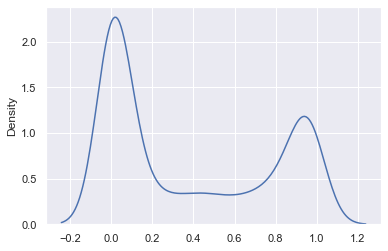

In [47]:
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
sns.kdeplot(cm.propensity["fitted"], label="Before Treated, X=1")

#### Inverse Weighted Propensity Score

In [48]:
propensity = cm.propensity["fitted"]
Xtrain_truth = Xtrain_reduced[features_chosen[features_reduced[2]]].values == 1

Xtrain_inv_propensity = Ytrain_reduced_output*np.where(Xtrain_reduced[features_chosen[features_reduced[idx]]].values == 1, 1 / propensity, 1 / (1 - propensity))
print("Doubly Robust Weighting Estimator: %.4f" %((np.sum(Xtrain_inv_propensity[Xtrain_reduced[features_chosen[features_reduced[idx]]].values == 1]) - np.sum(Xtrain_inv_propensity[Xtrain_reduced[features_chosen[features_reduced[idx]]].values == 0]))/Xtrain_reduced.shape[0] ))

Doubly Robust Weighting Estimator: -0.0476


### Part 3. Feature Importance Matching

In [49]:
# Define a model that only returns the final averaged SHAP value.
def return_shaps_final(X,idx,shap_function):
    shap_combined = np.zeros((len(shap_function),X.shape[1]))
    expected_value = 0
    for i in range(len(shap_function)):
        shap_combined[i,:] = shap_function[i].shap_values(X.iloc[idx:idx+1,:])[1]
        expected_value += shap_function[i].expected_value[1]/len(shap_function)
    # Get the average
    shap_combined_final = np.mean(shap_combined[:len(shap_function),:],axis=0)
    shap_combined_final = np.reshape(shap_combined_final, (-1, X.shape[1]))
    return shap_combined_final

In [50]:
import shap
# Get the SHAP values for each domain
LR_reduced_SHAP = shap.KernelExplainer(LR_calibrated_reduced.predict_proba, shap.kmeans(Xtrain_reduced,5))
RF_reduced_SHAP = shap.KernelExplainer(RF_calibrated_reduced.predict_proba, shap.kmeans(Xtrain_reduced,5))
XGB_reduced_SHAP = shap.KernelExplainer(XGBoost_calibrated_reduced.predict_proba, shap.kmeans(Xtrain_reduced,5))
MLP_reduced_SHAP = shap.KernelExplainer(MLP_calibrated_reduced.predict_proba, shap.kmeans(Xtrain_reduced,5))
SVM_reduced_SHAP = shap.KernelExplainer(SVC_best_calibrated_reduced.predict_proba, shap.kmeans(Xtrain_reduced,5))

In [51]:
# Get a bunch of SHAP values for the entire population
Xtest_reduced = Xtest[features_chosen[features_reduced]]
shap_population_reduced = np.zeros((990,24))
for i in range(990):
    print(i)
    shap_population_reduced[i,:] = return_shaps_final(Xtest_reduced,i,[LR_reduced_SHAP,RF_reduced_SHAP,XGB_reduced_SHAP,MLP_reduced_SHAP])

0



1



2



3



4



5



6



7



8



9



10



11



12



13



14



15



16



17



18



19



20



21



22



23



24



25



26



27



28



29



30



31



32



33



34



35



36



37



38



39



40



41



42



43



44



45



46



47



48



49



50



51



52



53



54



55



56



57



58



59



60



61



62



63



64



65



66



67



68



69



70



71



72



73



74



75



76



77



78



79



80



81



82



83



84



85



86



87



88



89



90



91



92



93



94



95



96



97



98



99



100



101



102



103



104



105



106



107



108



109



110



111



112



113



114



115



116



117



118



119



120



121



122



123



124



125



126



127



128



129



130



131



132



133



134



135



136



137



138



139



140



141



142



143



144



145



146



147



148



149



150



151



152



153



154



155



156



157



158



159



160



161



162



163



164



165



166



167



168



169



170



171



172



173



174



175



176



177



178



179



180



181



182



183



184



185



186



187



188



189



190



191



192



193



194



195



196



197



198



199



200



201



202



203



204



205



206



207



208



209



210



211



212



213



214



215



216



217



218



219



220



221



222



223



224



225



226



227



228



229



230



231



232



233



234



235



236



237



238



239



240



241



242



243



244



245



246



247



248



249



250



251



252



253



254



255



256



257



258



259



260



261



262



263



264



265



266



267



268



269



270



271



272



273



274



275



276



277



278



279



280



281



282



283



284



285



286



287



288



289



290



291



292



293



294



295



296



297



298



299



300



301



302



303



304



305



306



307



308



309



310



311



312



313



314



315



316



317



318



319



320



321



322



323



324



325



326



327



328



329



330



331



332



333



334



335



336



337



338



339



340



341



342



343



344



345



346



347



348



349



350



351



352



353



354



355



356



357



358



359



360



361



362



363



364



365



366



367



368



369



370



371



372



373



374



375



376



377



378



379



380



381



382



383



384



385



386



387



388



389



390



391



392



393



394



395



396



397



398



399



400



401



402



403



404



405



406



407



408



409



410



411



412



413



414



415



416



417



418



419



420



421



422



423



424



425



426



427



428



429



430



431



432



433



434



435



436



437



438



439



440



441



442



443



444



445



446



447



448



449



450



451



452



453



454



455



456



457



458



459



460



461



462



463



464



465



466



467



468



469



470



471



472



473



474



475



476



477



478



479



480



481



482



483



484



485



486



487



488



489



490



491



492



493



494



495



496



497



498



499



500



501



502



503



504



505



506



507



508



509



510



511



512



513



514



515



516



517



518



519



520



521



522



523



524



525



526



527



528



529



530



531



532



533



534



535



536



537



538



539



540



541



542



543



544



545



546



547



548



549



550



551



552



553



554



555



556



557



558



559



560



561



562



563



564



565



566



567



568



569



570



571



572



573



574



575



576



577



578



579



580



581



582



583



584



585



586



587



588



589



590



591



592



593



594



595



596



597



598



599



600



601



602



603



604



605



606



607



608



609



610



611



612



613



614



615



616



617



618



619



620



621



622



623



624



625



626



627



628



629



630



631



632



633



634



635



636



637



638



639



640



641



642



643



644



645



646



647



648



649



650



651



652



653



654



655



656



657



658



659



660



661



662



663



664



665



666



667



668



669



670



671



672



673



674



675



676



677



678



679



680



681



682



683



684



685



686



687



688



689



690



691



692



693



694



695



696



697



698



699



700



701



702



703



704



705



706



707



708



709



710



711



712



713



714



715



716



717



718



719



720



721



722



723



724



725



726



727



728



729



730



731



732



733



734



735



736



737



738



739



740



741



742



743



744



745



746



747



748



749



750



751



752



753



754



755



756



757



758



759



760



761



762



763



764



765



766



767



768



769



770



771



772



773



774



775



776



777



778



779



780



781



782



783



784



785



786



787



788



789



790



791



792



793



794



795



796



797



798



799



800



801



802



803



804



805



806



807



808



809



810



811



812



813



814



815



816



817



818



819



820



821



822



823



824



825



826



827



828



829



830



831



832



833



834



835



836



837



838



839



840



841



842



843



844



845



846



847



848



849



850



851



852



853



854



855



856



857



858



859



860



861



862



863



864



865



866



867



868



869



870



871



872



873



874



875



876



877



878



879



880



881



882



883



884



885



886



887



888



889



890



891



892



893



894



895



896



897



898



899



900



901



902



903



904



905



906



907



908



909



910



911



912



913



914



915



916



917



918



919



920



921



922



923



924



925



926



927



928



929



930



931



932



933



934



935



936



937



938



939



940



941



942



943



944



945



946



947



948



949



950



951



952



953



954



955



956



957



958



959



960



961



962



963



964



965



966



967



968



969



970



971



972



973



974



975



976



977



978



979



980



981



982



983



984



985



986



987



988



989


#### Perturb and get new SHAP values

In [52]:
## Get average SHAP value
idx = 9
np.mean(np.abs(shap_population_reduced[:,idx]))

0.018583671411300216

In [53]:
# Perturb the original dataset such that the features become 0 or 1.
Xtest_reduced = Xtest[features_chosen[features_reduced]]
Xtest_reduced[features_chosen[features_reduced[idx]]] = 1 - Xtest_reduced[features_chosen[features_reduced[idx]]]
# Get the bunch of SHAP values
shap_population_reduced_perturbed = np.zeros((200,24))
for i in range(200):
    print(i)
    shap_population_reduced_perturbed[i,:] = return_shaps_final(Xtest_reduced,i,[LR_reduced_SHAP,RF_reduced_SHAP,XGB_reduced_SHAP,MLP_reduced_SHAP])

0



1



2



3



4



5



6



7



8



9



10



11



12



13



14



15



16



17



18



19



20



21



22



23



24



25



26



27



28



29



30



31



32



33



34



35



36



37



38



39



40



41



42



43



44



45



46



47



48



49



50



51



52



53



54



55



56



57



58



59



60



61



62



63



64



65



66



67



68



69



70



71



72



73



74



75



76



77



78



79



80



81



82



83



84



85



86



87



88



89



90



91



92



93



94



95



96



97



98



99



100



101



102



103



104



105



106



107



108



109



110



111



112



113



114



115



116



117



118



119



120



121



122



123



124



125



126



127



128



129



130



131



132



133



134



135



136



137



138



139



140



141



142



143



144



145



146



147



148



149



150



151



152



153



154



155



156



157



158



159



160



161



162



163



164



165



166



167



168



169



170



171



172



173



174



175



176



177



178



179



180



181



182



183



184



185



186



187



188



189



190



191



192



193



194



195



196



197



198



199


#### Plot the graph of each class to SHAP values

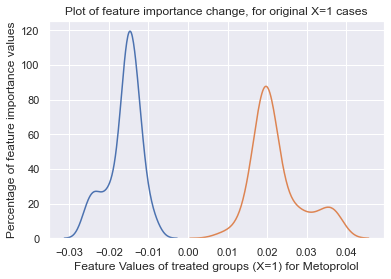

In [60]:
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
sns.kdeplot(shap_population_reduced[:200,idx][Xtest_reduced[features_chosen[features_reduced[idx]]][:200] == 1], 
            label="Before Treated, X=1")
sns.kdeplot(shap_population_reduced_perturbed[:200,idx][ Xtest_reduced[features_chosen[features_reduced[idx]]][:200] == 1],
            label="After Treated, do(X=0)")
plt.xlabel('Feature Values of treated groups (X=1) for ' + features_chosen[features_reduced[idx]] ) 
plt.ylabel('Percentage of feature importance values') 
plt.title('Plot of feature importance change, for original X=1 cases')
plt.show()

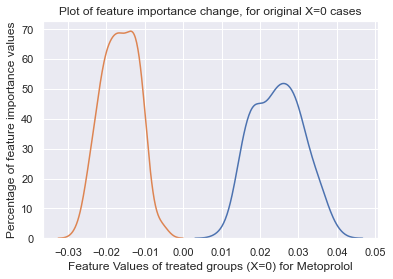

In [61]:
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
sns.kdeplot(shap_population_reduced[:200,idx][Xtest_reduced[features_chosen[features_reduced[idx]]][:200] == 0], 
            label="Before Treated, X=0")
sns.kdeplot(shap_population_reduced_perturbed[:200,idx][ Xtest_reduced[features_chosen[features_reduced[idx]]][:200] == 0],
            label="After Treated, do(X=1)")
plt.xlabel('Feature Values of treated groups (X=0) for ' + features_chosen[features_reduced[idx]] ) 
plt.ylabel('Percentage of feature importance values') 
plt.title('Plot of feature importance change, for original X=0 cases')
plt.show()

In [63]:
print("Average Treatment Effect for Control: %.4f"
% (np.mean(shap_population_reduced[:200,idx][Xtest_reduced[features_chosen[features_reduced[idx]]][:200] == 0]
- shap_population_reduced_perturbed[:200,idx][Xtest_reduced[features_chosen[features_reduced[idx]]][:200] == 0])) )
print("Average Treatment Effect for Intervention: %.4f"
% (np.mean(shap_population_reduced[:200,idx][Xtest_reduced[features_chosen[features_reduced[idx]]][:200] == 1]
- shap_population_reduced_perturbed[:200,idx][Xtest_reduced[features_chosen[features_reduced[idx]]][:200] == 1])) )
print("Average Treatment Effect for All: %.4f"
% (np.mean(np.abs(shap_population_reduced[:200,idx] - shap_population_reduced_perturbed[:200,idx])) ) )

Average Treatment Effect for Control: 0.0411
Average Treatment Effect for Intervention: -0.0385
Average Treatment Effect for All: 0.0400


### Chapter 6: Framework for Explainability and Actionability

### Chapter 6.2: Unified Explanations

In [65]:
def return_shaps(X,idx,shap_function):
    shap_combined = np.zeros((len(shap_function)+1,X.shape[1]))
    expected_value = 0
    for i in range(len(shap_function)):
        shap_combined[i,:] = shap_function[i].shap_values(X.iloc[idx:idx+1,:])[1]
        expected_value += shap_function[i].expected_value[1]/len(shap_function)
    # Get the average
    shap_combined[-1,:] = np.mean(shap_combined[:len(shap_function),:],axis=0)
    #shap.force_plot(expected_value, shap_combined[-1,:], X.iloc[idx:idx+1,:], feature_names=features_chosen)
    return shap_combined

In [66]:
# Reset
Xtest_reduced = Xtest[features_chosen[features_reduced]]

# Get SHAP values
shap_values_A_reduced = return_shaps(Xtest_reduced,86,[LR_reduced_SHAP,RF_reduced_SHAP,XGB_reduced_SHAP,MLP_reduced_SHAP])[-1,:]
shap_values_B_reduced = return_shaps(Xtest_reduced,404,[LR_reduced_SHAP,RF_reduced_SHAP,XGB_reduced_SHAP,MLP_reduced_SHAP])[-1,:]
shap_values_C_reduced = return_shaps(Xtest_reduced,147,[LR_reduced_SHAP,RF_reduced_SHAP,XGB_reduced_SHAP,MLP_reduced_SHAP])[-1,:]

#### Set the general parameters

In [67]:
# Reset
Xtest_reduced = Xtest[features_chosen[features_reduced]]

## Feature values ranked
Xtest_reduced.iloc[86,:][np.argsort(shap_values_A_reduced)[::-1]]
Xtest_reduced.iloc[404,:][np.argsort(shap_values_B_reduced)[::-1]]
Xtest_reduced.iloc[147,:][np.argsort(shap_values_C_reduced)[::-1]]

## SHAP values ranked
shap_values_A_reduced[np.argsort(shap_values_A_reduced)[::-1]]
shap_values_B_reduced[np.argsort(shap_values_B_reduced)[::-1]]
shap_values_C_reduced[np.argsort(shap_values_C_reduced)[::-1]]

array([ 0.14279092,  0.07409046,  0.06409146,  0.04270365,  0.03217614,
        0.02941698,  0.02772681,  0.0264617 ,  0.01844862,  0.01745448,
        0.01325174,  0.01170289,  0.01168879,  0.0110096 ,  0.00402167,
        0.00190048,  0.        , -0.00120771, -0.01393956, -0.01401679,
       -0.01414877, -0.0152528 , -0.02524333, -0.03586365])

In [68]:
for i in np.argsort(shap_values_C_reduced)[::-1]:
    print('& ' + features_chosen[features_reduced][i] + ' (%.4f) \\\ \hline' %(shap_values_C_reduced[i]))

& RDW (0.1428) \\ \hline
& Vancomycin HCl (0.0741) \\ \hline
& Neostigmine (0.0641) \\ \hline
& Metoprolol Tartrate (0.0427) \\ \hline
& MCHC (0.0322) \\ \hline
& pO2 (0.0294) \\ \hline
& Single internal mammary-coronary artery bypass (0.0277) \\ \hline
& age (0.0265) \\ \hline
& Nitroglycerin (0.0184) \\ \hline
& Insulin Human Regular (0.0175) \\ \hline
& Atorvastatin (0.0133) \\ \hline
& Urea Nitrogen (0.0117) \\ \hline
& Extracorporeal circulation auxiliary to open heart surgery (0.0117) \\ \hline
& Creatinine (0.0110) \\ \hline
& Furosemide (0.0040) \\ \hline
& Hemoglobin (0.0019) \\ \hline
& Levofloxacin (0.0000) \\ \hline
& Calcium Gluconate (-0.0012) \\ \hline
& pH (-0.0139) \\ \hline
& Nitroprusside Sodium (-0.0140) \\ \hline
& Acetaminophen (-0.0141) \\ \hline
& Aspirin (-0.0153) \\ \hline
& Metoprolol (-0.0252) \\ \hline
& PTT (-0.0359) \\ \hline


In [69]:
import warnings
warnings.filterwarnings("ignore")

#### Perturb for Feature A

In [71]:
print("Feature A")
Xtest_reduced = Xtest[features_chosen[features_reduced]].copy()
instance_temp = Xtest_reduced.iloc[86,:].copy()
print("Original model outcome: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))

# Modification 1
print("Feature 1: Original = %.1f, Changed %.1f" % (instance_temp['Levofloxacin'], 1-instance_temp['Levofloxacin']) )
# Set change
instance_temp['Levofloxacin'] = 1 - instance_temp['Levofloxacin']
# Get model output
print("Changed outcome 1, feature Levofloxacin: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[12], shap_temp[12]))

# Reset
instance_temp = Xtest_reduced.iloc[86,:].copy()

# Modification 2
print("Feature 2: Original = %.1f, Changed %.1f" % (instance_temp['Neostigmine'], 1-instance_temp['Neostigmine']) )
# Set change
instance_temp['Neostigmine'] = 1 - instance_temp['Neostigmine']
# Get model output
print("Changed outcome 2, feature Neostigmine: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[2], shap_temp[2]))
# Reset
instance_temp = Xtest_reduced.iloc[86,:].copy()

# Modification 3
print("Feature 3: Original = %.1f, Changed %.1f" % (instance_temp['Vancomycin HCl'], 1-instance_temp['Vancomycin HCl']) )
# Set change
instance_temp['Vancomycin HCl'] = 1 - instance_temp['Vancomycin HCl']
# Get model output
print("Changed outcome 3, feature Vancomycin HCl: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[16], shap_temp[16]))
# Reset
instance_temp = Xtest_reduced.iloc[86,:].copy()

# Modification 4
print("Feature 4: Original = %.1f, Changed %.1f" % (instance_temp['Metoprolol Tartrate'], 1-instance_temp['Metoprolol Tartrate']) )
# Set change
instance_temp['Metoprolol Tartrate'] = 1 - instance_temp['Metoprolol Tartrate']
# Get model output
print("Changed outcome 4, feature Metoprolol Tartrate: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[4], shap_temp[4]))
# Reset
instance_temp = Xtest_reduced.iloc[86,:].copy()

# Modification 5
print("Feature 5: Original = %.1f, Changed %.1f" % (instance_temp['Single internal mammary-coronary artery bypass'], 
                                         1-instance_temp['Single internal mammary-coronary artery bypass']) )
# Set change
instance_temp['Single internal mammary-coronary artery bypass'] = 1 - instance_temp['Single internal mammary-coronary artery bypass']
# Get model output
print("Changed outcome 5, feature Single internal mammary-coronary artery bypass: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[10], shap_temp[10]))
# Reset
instance_temp = Xtest_reduced.iloc[86,:].copy()


Feature A
Original model outcome: 0.7722
Feature 1: Original = 1.0, Changed 0.0
Changed outcome 1, feature Levofloxacin: 0.6797
Original SHAP value: 0.0934, Final SHAP value: 0.0000
Feature 2: Original = 0.0, Changed 1.0
Changed outcome 2, feature Neostigmine: 0.6661
Original SHAP value: 0.0609, Final SHAP value: -0.0755
Feature 3: Original = 1.0, Changed 0.0
Changed outcome 3, feature Vancomycin HCl: 0.6425
Original SHAP value: 0.0686, Final SHAP value: -0.0199
Feature 4: Original = 0.0, Changed 1.0
Changed outcome 4, feature Metoprolol Tartrate: 0.6988
Original SHAP value: 0.0340, Final SHAP value: -0.0565
Feature 5: Original = 0.0, Changed 1.0
Changed outcome 5, feature Single internal mammary-coronary artery bypass: 0.6717
Original SHAP value: 0.0253, Final SHAP value: -0.0681


In [72]:
### Set 5 interventions at the same time
instance_temp = Xtest_reduced.iloc[86,:].copy()

# Make 5 changes
print("Output when 0 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Levofloxacin'] = 1 - instance_temp['Levofloxacin']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[12], shap_temp[12]))
print("Output when 1 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Neostigmine'] = 1 - instance_temp['Neostigmine']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[2], shap_temp[2]))
print("Output when 2 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Vancomycin HCl'] = 1 - instance_temp['Vancomycin HCl']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[16], shap_temp[16]))
print("Output when 3 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Metoprolol Tartrate'] = 1 - instance_temp['Metoprolol Tartrate']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[4], shap_temp[4]))
print("Output when 4 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Single internal mammary-coronary artery bypass'] = 1 - instance_temp['Single internal mammary-coronary artery bypass']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[10], shap_temp[10]))
print("Output when 5 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))

Output when 0 features are changed: 0.7722
Original SHAP value: 0.0934, Final SHAP value: 0.0000
Output when 1 features are changed: 0.6797
Original SHAP value: 0.0609, Final SHAP value: -0.0783
Output when 2 features are changed: 0.5674
Original SHAP value: 0.0686, Final SHAP value: -0.0194
Output when 3 features are changed: 0.4242
Original SHAP value: 0.0340, Final SHAP value: -0.0519
Output when 4 features are changed: 0.3903
Original SHAP value: 0.0253, Final SHAP value: -0.0483
Output when 5 features are changed: 0.3235


#### Perturb for Feature B

In [73]:
print("Feature B")
Xtest_reduced = Xtest[features_chosen[features_reduced]]
instance_temp = Xtest_reduced.iloc[404,:].copy()
print("Original model outcome: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))

# Modification 1
print("Feature 1: Original = %.1f, Changed %.1f" % (instance_temp['Neostigmine'], 1-instance_temp['Neostigmine']) )
# Set change
instance_temp['Neostigmine'] = 1 - instance_temp['Neostigmine']
# Get model output
print("Changed outcome 1, feature Neostigmine: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[2], shap_temp[2]))
# Reset
temp = Xtest_reduced.iloc[404,:].copy()

# Modification 2
print("Feature 2: Original = %.1f, Changed %.1f" % (instance_temp['Metoprolol'], 1-instance_temp['Metoprolol']) )
# Set change
instance_temp['Metoprolol'] = 1 - instance_temp['Metoprolol']
# Get model output
print("Changed outcome 2, feature Metoprolol: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[9], shap_temp[9]))
# Reset
instance_temp = Xtest_reduced.iloc[404,:].copy()

# Modification 3
print("Feature 3: Original = %.1f, Changed %.1f" % (instance_temp['Metoprolol Tartrate'], 1-instance_temp['Metoprolol Tartrate']) )
# Set change
instance_temp['Metoprolol Tartrate'] = 1 - instance_temp['Metoprolol Tartrate']
# Get model output
print("Changed outcome 3, feature Metoprolol Tartrate: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[4], shap_temp[4]))
# Reset
instance_temp = Xtest_reduced.iloc[404,:].copy()

# Modification 4
print("Feature 4: Original = %.1f, Changed %.1f" % (instance_temp['Single internal mammary-coronary artery bypass'], 
                                                    1-instance_temp['Single internal mammary-coronary artery bypass']) )
# Set change
instance_temp['Single internal mammary-coronary artery bypass'] = 1 - instance_temp['Single internal mammary-coronary artery bypass']
# Get model output
print("Changed outcome 4, feature Single internal mammary-coronary artery bypass: %.4f" 
                                    %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[10], shap_temp[10]))
# Reset
instance_temp = Xtest_reduced.iloc[404,:].copy()

# Modification 5
print("Feature 5: Original = %.1f, Changed %.1f" % (instance_temp['Insulin Human Regular'], 
                                         1-instance_temp['Insulin Human Regular']) )
# Set change
instance_temp['Insulin Human Regular'] = 1 - instance_temp['Insulin Human Regular']
# Get model output
print("Changed outcome 5, feature Insulin Human Regular: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[6], shap_temp[6]))
# Reset
instance_temp = Xtest_reduced.iloc[404,:].copy()


Feature B
Original model outcome: 0.5946
Feature 1: Original = 0.0, Changed 1.0
Changed outcome 1, feature Neostigmine: 0.4243
Original SHAP value: 0.0609, Final SHAP value: -0.0917
Feature 2: Original = 1.0, Changed 0.0
Changed outcome 2, feature Metoprolol: 0.3309
Original SHAP value: -0.0229, Final SHAP value: -0.0228
Feature 3: Original = 0.0, Changed 1.0
Changed outcome 3, feature Metoprolol Tartrate: 0.4854
Original SHAP value: 0.0340, Final SHAP value: -0.0723
Feature 4: Original = 0.0, Changed 1.0
Changed outcome 4, feature Single internal mammary-coronary artery bypass: 0.4473
Original SHAP value: 0.0253, Final SHAP value: -0.0736
Feature 5: Original = 0.0, Changed 1.0
Changed outcome 5, feature Insulin Human Regular: 0.5092
Original SHAP value: 0.0181, Final SHAP value: -0.0247


In [74]:
### Set 5 interventions at the same time
instance_temp = Xtest_reduced.iloc[147,:].copy()
print("Output when 0 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Make 5 changes
instance_temp['Neostigmine'] = 1 - instance_temp['Neostigmine']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[2], shap_temp[2]))
print("Output when 1 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Metoprolol'] = 1 - instance_temp['Metoprolol']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[9], shap_temp[9]))
print("Output when 2 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Metoprolol Tartrate'] = 1 - instance_temp['Metoprolol Tartrate']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[4], shap_temp[4]))
print("Output when 3 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Single internal mammary-coronary artery bypass'] = 1 - instance_temp['Single internal mammary-coronary artery bypass']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[10], shap_temp[10]))
print("Output when 4 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Insulin Human Regular'] = 1 - instance_temp['Insulin Human Regular']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[6], shap_temp[6]))
print("Output when 5 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))

Output when 0 features are changed: 0.7473
Original SHAP value: 0.0609, Final SHAP value: -0.0809
Output when 1 features are changed: 0.6331
Original SHAP value: -0.0229, Final SHAP value: 0.0387
Output when 2 features are changed: 0.7233
Original SHAP value: 0.0340, Final SHAP value: -0.0690
Output when 3 features are changed: 0.6303
Original SHAP value: 0.0253, Final SHAP value: -0.0717
Output when 4 features are changed: 0.4810
Original SHAP value: 0.0181, Final SHAP value: -0.0337
Output when 5 features are changed: 0.3617


#### Perturb the Feature C

In [75]:
print("Feature C")
Xtest_reduced = Xtest[features_chosen[features_reduced]]
instance_temp = Xtest_reduced.iloc[147,:].copy()
print("Original model outcome: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))

# Modification 1
print("Feature 1: Original = %.1f, Changed %.1f" % (temp['Neostigmine'], 1-temp['Neostigmine']) )
# Set change
instance_temp['Vancomycin HCl'] = 1 - instance_temp['Vancomycin HCl']
# Get model output
print("Changed outcome 1, feature Neostigmine: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[16], shap_temp[16]))
# Reset
instance_temp = Xtest_reduced.iloc[147,:].copy()

# Modification 2
print("Feature 2: Original = %.1f, Changed %.1f" % (instance_temp['Metoprolol'], 1-instance_temp['Metoprolol']) )
# Set change
instance_temp['Neostigmine'] = 1 - instance_temp['Neostigmine']
# Get model output
print("Changed outcome 2, feature Metoprolol: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[2], shap_temp[2]))
# Reset
instance_temp = Xtest_reduced.iloc[147,:].copy()

# Modification 3
print("Feature 3: Original = %.1f, Changed %.1f" % (instance_temp['Metoprolol Tartrate'], 1-instance_temp['Metoprolol Tartrate']) )
# Set change
instance_temp['Metoprolol Tartrate'] = 1 - instance_temp['Metoprolol Tartrate']
# Get model output
print("Changed outcome 3, feature Metoprolol Tartrate: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[4], shap_temp[4]))
# Reset
instance_temp = Xtest_reduced.iloc[147,:].copy()

# Modification 4
print("Feature 4: Original = %.1f, Changed %.1f" % (instance_temp['Single internal mammary-coronary artery bypass'], 
                                                    1-instance_temp['Single internal mammary-coronary artery bypass']) )
# Set change
instance_temp['Single internal mammary-coronary artery bypass'] = 1 - instance_temp['Single internal mammary-coronary artery bypass']
# Get model output
print("Changed outcome 4, feature Single internal mammary-coronary artery bypass: %.4f" 
                                    %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[10], shap_temp[10]))
# Reset
instance_temp = Xtest_reduced.iloc[147,:].copy()

# Modification 5
print("Feature 5: Original = %.1f, Changed %.1f" % (instance_temp['Insulin Human Regular'], 
                                         1-instance_temp['Insulin Human Regular']) )
# Set change
instance_temp['Insulin Human Regular'] = 1 - instance_temp['Insulin Human Regular']
# Get model output
print("Changed outcome 5, feature Insulin Human Regular: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[6], shap_temp[6]))
# Reset
instance_temp = Xtest_reduced.iloc[147,:].copy()


Feature C
Original model outcome: 0.7473
Feature 1: Original = 0.0, Changed 1.0
Changed outcome 1, feature Neostigmine: 0.5837
Original SHAP value: 0.0686, Final SHAP value: -0.0210
Feature 2: Original = 0.0, Changed 1.0
Changed outcome 2, feature Metoprolol: 0.6331
Original SHAP value: 0.0609, Final SHAP value: -0.0806
Feature 3: Original = 0.0, Changed 1.0
Changed outcome 3, feature Metoprolol Tartrate: 0.6527
Original SHAP value: 0.0340, Final SHAP value: -0.0692
Feature 4: Original = 0.0, Changed 1.0
Changed outcome 4, feature Single internal mammary-coronary artery bypass: 0.6280
Original SHAP value: 0.0253, Final SHAP value: -0.0718
Feature 5: Original = 0.0, Changed 1.0
Changed outcome 5, feature Insulin Human Regular: 0.7570
Original SHAP value: 0.0181, Final SHAP value: -0.0079


In [76]:
### Set 5 interventions at the same time
instance_temp = Xtest_reduced.iloc[147,:].copy()
print("Output when 0 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))

# Make 5 changes
instance_temp['Vancomycin HCl'] = 1 - instance_temp['Vancomycin HCl']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[16], shap_temp[16]))
print("Output when 1 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Neostigmine'] = 1 - instance_temp['Neostigmine']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[2], shap_temp[2]))
print("Output when 2 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Metoprolol Tartrate'] = 1 - instance_temp['Metoprolol Tartrate']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[4], shap_temp[4]))
print("Output when 3 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Single internal mammary-coronary artery bypass'] = 1 - instance_temp['Single internal mammary-coronary artery bypass']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[10], shap_temp[10]))
print("Output when 4 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Insulin Human Regular'] = 1 - instance_temp['Insulin Human Regular']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[6], shap_temp[6]))
print("Output when 5 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))

Output when 0 features are changed: 0.7473
Original SHAP value: 0.0686, Final SHAP value: -0.0212
Output when 1 features are changed: 0.5837
Original SHAP value: 0.0609, Final SHAP value: -0.0852
Output when 2 features are changed: 0.4717
Original SHAP value: 0.0340, Final SHAP value: -0.0627
Output when 3 features are changed: 0.4027
Original SHAP value: 0.0253, Final SHAP value: -0.0561
Output when 4 features are changed: 0.3039
Original SHAP value: 0.0181, Final SHAP value: -0.0288
Output when 5 features are changed: 0.2283


### Part 5: For a particular instance, change interventions, measure outcome SHAP values

#### Make changes to the feature at index 1 (RDW)

In [77]:
shap_values_A_perturb = np.zeros((100,24))
shap_values_B_perturb = np.zeros((100,24))
shap_values_C_perturb = np.zeros((100,24))
feature_values_A_perturb = np.zeros((100,24))
feature_values_B_perturb = np.zeros((100,24))
feature_values_C_perturb = np.zeros((100,24))

In [78]:
Xtest_reduced = Xtest[features_chosen[features_reduced]]
idx = 1
for i in range(100):
    print(i)
    Xtest_reduced.iloc[:,idx] = i/100
    feature_values_A_perturb[i,:] = Xtest_reduced.iloc[86,:]
    feature_values_B_perturb[i,:] = Xtest_reduced.iloc[404,:]
    feature_values_C_perturb[i,:] = Xtest_reduced.iloc[147,:]
    shap_values_A_perturb[i,:] = return_shaps_final(Xtest_reduced,86,[LR_reduced_SHAP,RF_reduced_SHAP,XGB_reduced_SHAP,MLP_reduced_SHAP])
    shap_values_B_perturb[i,:] = return_shaps_final(Xtest_reduced,404,[LR_reduced_SHAP,RF_reduced_SHAP,XGB_reduced_SHAP,MLP_reduced_SHAP])
    shap_values_C_perturb[i,:] = return_shaps_final(Xtest_reduced,147,[LR_reduced_SHAP,RF_reduced_SHAP,XGB_reduced_SHAP,MLP_reduced_SHAP])

0



1



2



3



4



5



6



7



8



9



10



11



12



13



14



15



16



17



18



19



20



21



22



23



24



25



26



27



28



29



30



31



32



33



34



35



36



37



38



39



40



41



42



43



44



45



46



47



48



49



50



51



52



53



54



55



56



57



58



59



60



61



62



63



64



65



66



67



68



69



70



71



72



73



74



75



76



77



78



79



80



81



82



83



84



85



86



87



88



89



90



91



92



93



94



95



96



97



98



99


#### Record changes to A

#### Find SHAP values

In [79]:
idx = 1

In [80]:
import seaborn as sns; sns.set(color_codes=True)

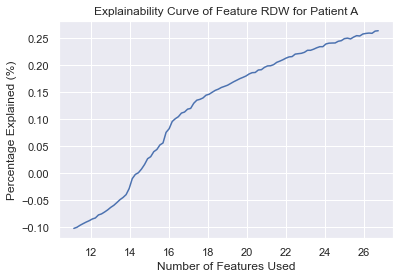

In [81]:
import matplotlib.pyplot as plt
plt.plot(np.arange(min(X[features_chosen[features_reduced][idx]]),max(X[features_chosen[features_reduced][idx]]),
             (max(X[features_chosen[features_reduced][idx]])-min(X[features_chosen[features_reduced][idx]]))/100),
                shap_values_A_perturb[:,idx]) 
plt.xlabel('Number of Features Used') 
plt.ylabel('Percentage Explained (%)')
plt.title('Explainability Curve of Feature '+ features_chosen[features_reduced][idx]+' for Patient A')
plt.show()

#### Find model output

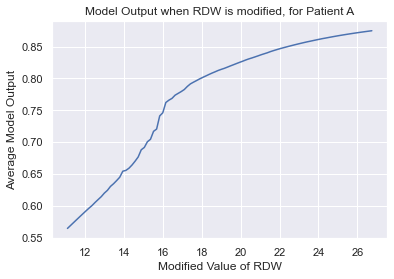

In [83]:
0.2*(LR_calibrated_reduced.predict_proba(feature_values_A_perturb)[:,1]+
                                     RF_calibrated_reduced.predict_proba(feature_values_A_perturb)[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(feature_values_A_perturb)[:,1]+
                                     MLP_calibrated_reduced.predict_proba(feature_values_A_perturb)[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(feature_values_A_perturb)[:,1])
import matplotlib.pyplot as plt
plt.plot(np.arange(min(X[features_chosen[features_reduced][1]]),max(X[features_chosen[features_reduced][1]]),
             (max(X[features_chosen[features_reduced][1]])-min(X[features_chosen[features_reduced][1]]))/100),
                0.2*(LR_calibrated_reduced.predict_proba(feature_values_A_perturb)[:,1]+
                                     RF_calibrated_reduced.predict_proba(feature_values_A_perturb)[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(feature_values_A_perturb)[:,1]+
                                     MLP_calibrated_reduced.predict_proba(feature_values_A_perturb)[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(feature_values_A_perturb)[:,1])) 
plt.xlabel('Modified Value of ' + features_chosen[features_reduced][1]) 
plt.ylabel('Average Model Output')
plt.title('Model Output when ' + features_chosen[features_reduced][1] + ' is modified, for Patient A')
plt.show()

### Bin Method

In [84]:
import warnings
warnings.filterwarnings("ignore")
Xtest_reduced = Xtest[features_chosen[features_reduced]]

In [89]:
def get_distribution(X,Y):
    df_dist = pd.DataFrame(np.zeros((16,X.shape[1])),columns=X.columns.values)
    mean_all = X.apply(np.nanmean, axis=0)
    std_all = X.apply(np.nanstd,axis=0)
    df_dist.iloc[0,:] = np.nanpercentile(X,2.275,axis=0)
    df_dist.iloc[1,:] = np.nanpercentile(X,15.865,axis=0)
    df_dist.iloc[2,:] = np.nanpercentile(X,50.000,axis=0)
    df_dist.iloc[3,:] = np.nanpercentile(X,84.135,axis=0)
    df_dist.iloc[4,:] = np.nanpercentile(X,97.725,axis=0)
    df_dist.iloc[5,:] = np.nanpercentile(X.loc[Y['expire_flag']==0],2.275,axis=0)
    df_dist.iloc[6,:] = np.nanpercentile(X.loc[Y['expire_flag']==0],15.865,axis=0)
    df_dist.iloc[7,:] = np.nanpercentile(X.loc[Y['expire_flag']==0],50.000,axis=0)
    df_dist.iloc[8,:] = np.nanpercentile(X.loc[Y['expire_flag']==0],84.135,axis=0)
    df_dist.iloc[9,:] = np.nanpercentile(X.loc[Y['expire_flag']==0],97.725,axis=0)
    df_dist.iloc[10,:] = np.nanpercentile(X.loc[Y['expire_flag']==1],2.275,axis=0)
    df_dist.iloc[11,:] = np.nanpercentile(X.loc[Y['expire_flag']==1],15.865,axis=0)
    df_dist.iloc[12,:] = np.nanpercentile(X.loc[Y['expire_flag']==1],50.000,axis=0)
    df_dist.iloc[13,:] = np.nanpercentile(X.loc[Y['expire_flag']==1],84.135,axis=0)
    df_dist.iloc[14,:] = np.nanpercentile(X.loc[Y['expire_flag']==1],97.725,axis=0)
    df_dist.iloc[15,:] = X.apply(checkbinary, axis=0)
    return df_dist

In [90]:
distribution_reduced = get_distribution(Xtrain_reduced,Y)

#### Get the original feature value and instance

In [91]:
instance_temp = Xtest_reduced.iloc[86,:].copy()
print("Original Value %.4f" %(instance_temp[idx]))
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f" %(shap_values_A_reduced[idx]))
print("Output, original: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))

Original Value 0.3462
Original SHAP value: 0.1076
Output, original: 0.7722


#### Get changes to a particular instance

In [92]:
# Change to various bins, 0 - 4
instance_temp = Xtest_reduced.iloc[86,:].copy()
for i in distribution_reduced.iloc[:5,idx].values:
    instance_temp[idx] = i
    shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
    print("Feature "+ str(idx) + ": %.4f" %(i))
    print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[idx], shap_temp[idx]))
    print("Output: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                         RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                         XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                         MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                         SVC_best_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))

Feature 1: 0.0641
Original SHAP value: 0.1076, Final SHAP value: -0.0828
Output: 0.5936
Feature 1: 0.1090
Original SHAP value: 0.1076, Final SHAP value: -0.0688
Output: 0.6139
Feature 1: 0.1731
Original SHAP value: 0.1076, Final SHAP value: -0.0395
Output: 0.6460
Feature 1: 0.2949
Original SHAP value: 0.1076, Final SHAP value: 0.0602
Output: 0.7236
Feature 1: 0.5513
Original SHAP value: 0.1076, Final SHAP value: 0.1773
Output: 0.8237


### Part 6: Get explainability curves when outcomes are flipped

In [93]:
shap_values_A_perturb_flip = np.zeros((100,24))
shap_values_B_perturb_flip = np.zeros((100,24))
shap_values_C_perturb_flip = np.zeros((100,24))
feature_values_A_perturb_flip = np.zeros((100,24))
feature_values_B_perturb_flip = np.zeros((100,24))
feature_values_C_perturb_flip = np.zeros((100,24))

In [94]:
Xtest_reduced = Xtest[features_chosen[features_reduced]]
idx_flip = 10
Xtest_reduced.iloc[86,idx_flip] = 1 - Xtest_reduced.iloc[86,idx_flip]
Xtest_reduced.iloc[404,idx_flip] = 1 - Xtest_reduced.iloc[404,idx_flip]
Xtest_reduced.iloc[147,idx_flip] = 1 - Xtest_reduced.iloc[147,idx_flip]
idx = 1
for i in range(100):
    print(i)
    Xtest_reduced.iloc[:,idx] = i/100
    feature_values_A_perturb_flip[i,:] = Xtest_reduced.iloc[86,:]
    feature_values_B_perturb_flip[i,:] = Xtest_reduced.iloc[404,:]
    feature_values_C_perturb_flip[i,:] = Xtest_reduced.iloc[147,:]
    shap_values_A_perturb_flip[i,:] = return_shaps_final(Xtest_reduced,86,[LR_reduced_SHAP,RF_reduced_SHAP,XGB_reduced_SHAP,MLP_reduced_SHAP])
    shap_values_B_perturb_flip[i,:] = return_shaps_final(Xtest_reduced,404,[LR_reduced_SHAP,RF_reduced_SHAP,XGB_reduced_SHAP,MLP_reduced_SHAP])
    shap_values_C_perturb_flip[i,:] = return_shaps_final(Xtest_reduced,147,[LR_reduced_SHAP,RF_reduced_SHAP,XGB_reduced_SHAP,MLP_reduced_SHAP])

0



1



2



3



4



5



6



7



8



9



10



11



12



13



14



15



16



17



18



19



20



21



22



23



24



25



26



27



28



29



30



31



32



33



34



35



36



37



38



39



40



41



42



43



44



45



46



47



48



49



50



51



52



53



54



55



56



57



58



59



60



61



62



63



64



65



66



67



68



69



70



71



72



73



74



75



76



77



78



79



80



81



82



83



84



85



86



87



88



89



90



91



92



93



94



95



96



97



98



99


#### Plot for A

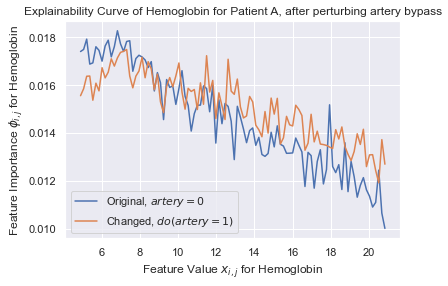

In [95]:
idx = 22; idx_flip = 10;

import matplotlib.pyplot as plt
plt.plot(np.arange(min(X[features_chosen[features_reduced][idx]]),max(X[features_chosen[features_reduced][idx]]),
             (max(X[features_chosen[features_reduced][idx]])-min(X[features_chosen[features_reduced][idx]]))/100),
                shap_values_A_perturb[:,idx], label='Original, $artery=0$') 
plt.plot(np.arange(min(X[features_chosen[features_reduced][idx]]),max(X[features_chosen[features_reduced][idx]]),
             (max(X[features_chosen[features_reduced][idx]])-min(X[features_chosen[features_reduced][idx]]))/100),
                shap_values_A_perturb_flip[:,idx], label='Changed, $do(artery=1)$') 
plt.xlabel('Feature Value ' + r'$x_{i,j}$' + ' for ' + features_chosen[features_reduced][idx]) 
plt.ylabel('Feature Importance ' + r'$\phi_{i,j}$'+ ' for ' + features_chosen[features_reduced][idx])
plt.title('Explainability Curve of '+ features_chosen[features_reduced][idx]+' for Patient A, after perturbing artery bypass')
#plt.title('Explainability Curve of '+ features_chosen[features_reduced][idx]+' for Patient A, after perturbing '+ features_chosen[features_reduced][idx_flip])
plt.legend()
plt.show()

#### Plot for B

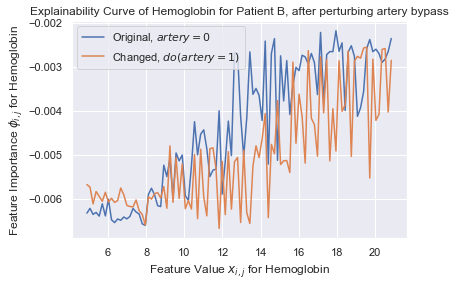

In [96]:
idx = 22; idx_flip = 10;

import matplotlib.pyplot as plt
plt.plot(np.arange(min(X[features_chosen[features_reduced][idx]]),max(X[features_chosen[features_reduced][idx]]),
             (max(X[features_chosen[features_reduced][idx]])-min(X[features_chosen[features_reduced][idx]]))/100),
                shap_values_B_perturb[:,idx], label='Original, $artery=0$') 
plt.plot(np.arange(min(X[features_chosen[features_reduced][idx]]),max(X[features_chosen[features_reduced][idx]]),
             (max(X[features_chosen[features_reduced][idx]])-min(X[features_chosen[features_reduced][idx]]))/100),
                shap_values_B_perturb_flip[:,idx], label='Changed, $do(artery=1)$') 
plt.xlabel('Feature Value ' + r'$x_{i,j}$' + ' for ' + features_chosen[features_reduced][idx]) 
plt.ylabel('Feature Importance ' + r'$\phi_{i,j}$'+ ' for ' + features_chosen[features_reduced][idx])
plt.title('Explainability Curve of '+ features_chosen[features_reduced][idx]+' for Patient B, after perturbing artery bypass')
#plt.title('Explainability Curve of '+ features_chosen[features_reduced][idx]+' for Patient B, after perturbing '+ features_chosen[features_reduced][idx_flip])
plt.legend()
plt.show()

#### Plot for C

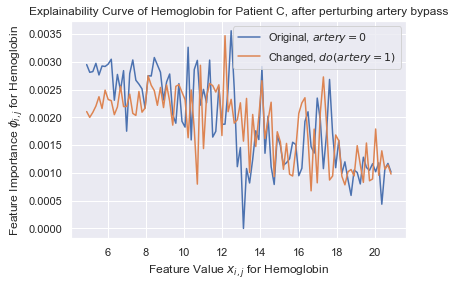

In [97]:
idx = 22; idx_flip = 10;

import matplotlib.pyplot as plt
plt.plot(np.arange(min(X[features_chosen[features_reduced][idx]]),max(X[features_chosen[features_reduced][idx]]),
             (max(X[features_chosen[features_reduced][idx]])-min(X[features_chosen[features_reduced][idx]]))/100),
                shap_values_C_perturb[:,idx], label='Original, $artery=0$') 
plt.plot(np.arange(min(X[features_chosen[features_reduced][idx]]),max(X[features_chosen[features_reduced][idx]]),
             (max(X[features_chosen[features_reduced][idx]])-min(X[features_chosen[features_reduced][idx]]))/100),
                shap_values_C_perturb_flip[:,idx], label='Changed, $do(artery=1)$') 
plt.xlabel('Feature Value ' + r'$x_{i,j}$' + ' for ' + features_chosen[features_reduced][idx]) 
plt.ylabel('Feature Importance ' + r'$\phi_{i,j}$'+ ' for ' + features_chosen[features_reduced][idx])
plt.title('Explainability Curve of '+ features_chosen[features_reduced][idx]+' for Patient C, after perturbing artery bypass')
#plt.title('Explainability Curve of '+ features_chosen[features_reduced][idx]+' for Patient C, after perturbing '+ features_chosen[features_reduced][idx_flip])
plt.legend()
plt.show()

In [98]:
import dill
dill.dump_session('chapter_4_env.db')

In [ ]:
#dill.load_session('chapter_3_checkpoint.db')